In [1]:
# Read data
import numpy as np                           # Linear Algebra (calculate the mean and standard deviation)
import pandas as pd                          # manipulate data, data processing, load csv file I/O (e.g. pd.read_csv)

# Visualization
import matplotlib.pyplot as plt              # Visualization using matplotlib
%matplotlib inline
import seaborn as sns                        # Visualization using seaborn

# style
plt.style.use("fivethirtyeight")             # Set Graphs Background style using matplotlib
sns.set_style("darkgrid")                    # Set Graphs Background style using seaborn

import warnings                              # To ignore any warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from mlxtend.plotting import plot_decision_regions
from sklearn.decomposition import PCA

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score

In [3]:
df=pd.read_csv(r'C:/Users/ranja/Downloads/Iris(1).csv')

In [4]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
# import first & last 5 rows
display(df.head())
display(df.tail())

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [6]:
df.shape

(150, 6)

In [7]:
df.drop('Id',axis=1,inplace=True) #dropping the Id column as it is unecessary

df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
# Displaying the number of rows randomly
df.sample(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
38,4.4,3.0,1.3,0.2,Iris-setosa
12,4.8,3.0,1.4,0.1,Iris-setosa
82,5.8,2.7,3.9,1.2,Iris-versicolor
11,4.8,3.4,1.6,0.2,Iris-setosa
56,6.3,3.3,4.7,1.6,Iris-versicolor
81,5.5,2.4,3.7,1.0,Iris-versicolor
116,6.5,3.0,5.5,1.8,Iris-virginica
145,6.7,3.0,5.2,2.3,Iris-virginica
103,6.3,2.9,5.6,1.8,Iris-virginica
122,7.7,2.8,6.7,2.0,Iris-virginica


In [9]:
# checking dimension (num of rows and columns) of dataset
print("iris data shape (Rows, Columns):", df.shape)

iris data shape (Rows, Columns): (150, 5)


In [10]:
df.columns.tolist()

['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']

In [11]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [12]:
from pandas.api.types import is_numeric_dtype

for col in df.columns:
    if is_numeric_dtype(df[col]):
        print('%s:' % (col))
        print('\t Mean = %.2f' % df[col].mean())
        print('\t Standard deviation = %.2f' % df[col].std())
        print('\t Minimum = %.2f' % df[col].min())
        print('\t Maximum = %.2f' % df[col].max())

SepalLengthCm:
	 Mean = 5.84
	 Standard deviation = 0.83
	 Minimum = 4.30
	 Maximum = 7.90
SepalWidthCm:
	 Mean = 3.05
	 Standard deviation = 0.43
	 Minimum = 2.00
	 Maximum = 4.40
PetalLengthCm:
	 Mean = 3.76
	 Standard deviation = 1.76
	 Minimum = 1.00
	 Maximum = 6.90
PetalWidthCm:
	 Mean = 1.20
	 Standard deviation = 0.76
	 Minimum = 0.10
	 Maximum = 2.50


In [13]:
print('Iris-setosa')
setosa = df['Species'] == 'Iris-setosa'
print(df[setosa].describe())

print('\nIris-versicolor')
versicolor = df['Species'] == 'Iris-versicolor'
print(df[versicolor].describe())

print('\nIris-virginica')
virginica = df['Species'] == 'Iris-virginica'
print(df[virginica].describe())

Iris-setosa
       SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count       50.00000     50.000000      50.000000      50.00000
mean         5.00600      3.418000       1.464000       0.24400
std          0.35249      0.381024       0.173511       0.10721
min          4.30000      2.300000       1.000000       0.10000
25%          4.80000      3.125000       1.400000       0.20000
50%          5.00000      3.400000       1.500000       0.20000
75%          5.20000      3.675000       1.575000       0.30000
max          5.80000      4.400000       1.900000       0.60000

Iris-versicolor
       SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count      50.000000     50.000000      50.000000     50.000000
mean        5.936000      2.770000       4.260000      1.326000
std         0.516171      0.313798       0.469911      0.197753
min         4.900000      2.000000       3.000000      1.000000
25%         5.600000      2.525000       4.000000      1.200000
50%        

In [14]:
#Preprocessing of data
# Checking for missing values
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [15]:
#Checking for duplicates
duplicates = df[df.duplicated()]
print("Number of duplicates:", len(duplicates))

Number of duplicates: 3


In [16]:
print("Duplicate Rows :")
df[df.duplicated()]

Duplicate Rows :


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


In [17]:
df.duplicated().value_counts()

False    147
True       3
dtype: int64

In [18]:
#Removing duplicates
df.drop_duplicates(inplace=True)

df.shape

(147, 5)

In [19]:
df.duplicated().any()

False

In [20]:
# Checking for outliers
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,147.000000,147.000000,147.000000,147.000000
mean,5.856463,3.055782,3.780272,1.208844
std,0.829100,0.437009,1.759111,0.757874
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


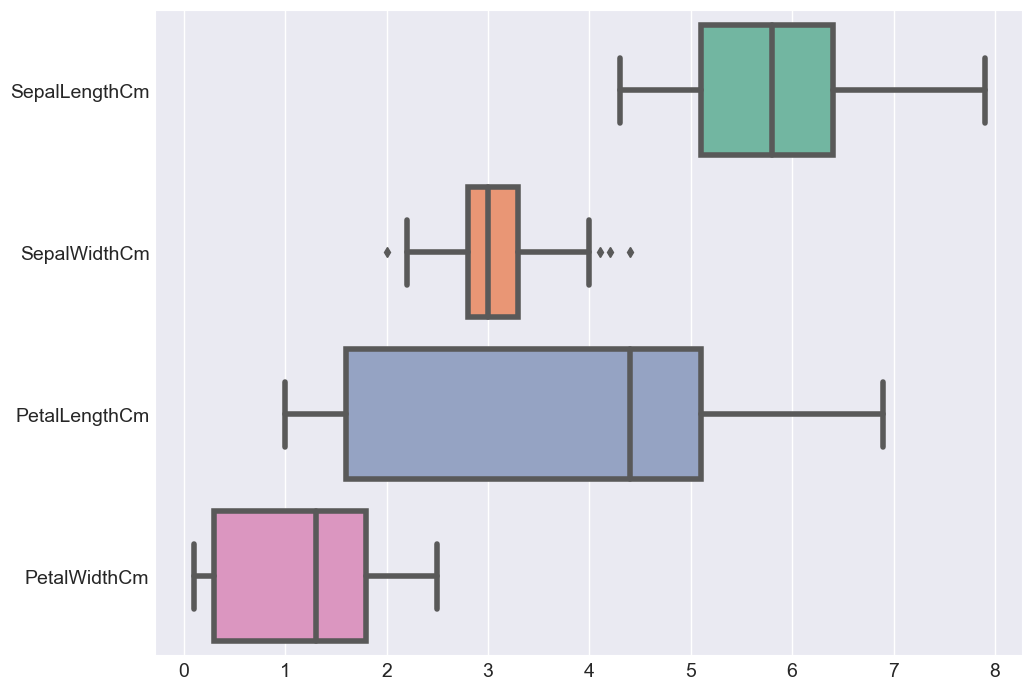

In [21]:
plt.figure(figsize=(10,8))
sns.boxplot(data=df, orient='h', palette='Set2');

In [22]:
# Checking for the correlation
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109321,0.871305,0.817058
SepalWidthCm,-0.109321,1.000000,-0.421057,-0.356376
PetalLengthCm,0.871305,-0.421057,1.000000,0.961883
PetalWidthCm,0.817058,-0.356376,0.961883,1.000000


In [23]:
df.corr()['PetalWidthCm']

SepalLengthCm    0.817058
SepalWidthCm    -0.356376
PetalLengthCm    0.961883
PetalWidthCm     1.000000
Name: PetalWidthCm, dtype: float64

In [24]:
# Calculate the skewness for all columns
df.skew()

SepalLengthCm    0.292560
SepalWidthCm     0.324351
PetalLengthCm   -0.293763
PetalWidthCm    -0.113479
dtype: float64

In [25]:
df.skew().sort_values(ascending=True)

PetalLengthCm   -0.293763
PetalWidthCm    -0.113479
SepalLengthCm    0.292560
SepalWidthCm     0.324351
dtype: float64

In [26]:
# Checking for the unique values
df.nunique()

SepalLengthCm    35
SepalWidthCm     23
PetalLengthCm    43
PetalWidthCm     22
Species           3
dtype: int64

In [27]:
# Checking for the value counts
df["Species"].value_counts()

Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: Species, dtype: int64

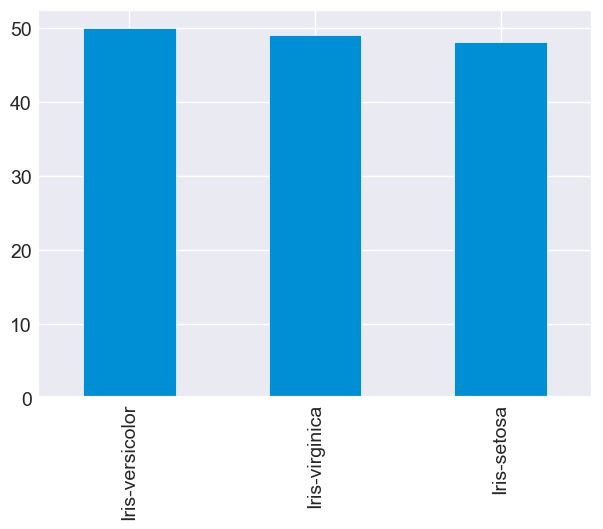

In [28]:
# Checking for the value counts
df['Species'].value_counts().plot(kind='bar')
plt.show()

In [29]:
#PetalWidthCm

df['PetalWidthCm'].nunique()

22

     PetalWidthCm
0.2            28
1.3            13
1.8            12
1.5            12
1.4             8
2.3             8
1.0             7
0.4             7
0.3             7
2.1             6
2.0             6
1.2             5
0.1             4
1.6             4
1.9             4
2.5             3
2.2             3
2.4             3
1.1             3
1.7             2
0.6             1
0.5             1


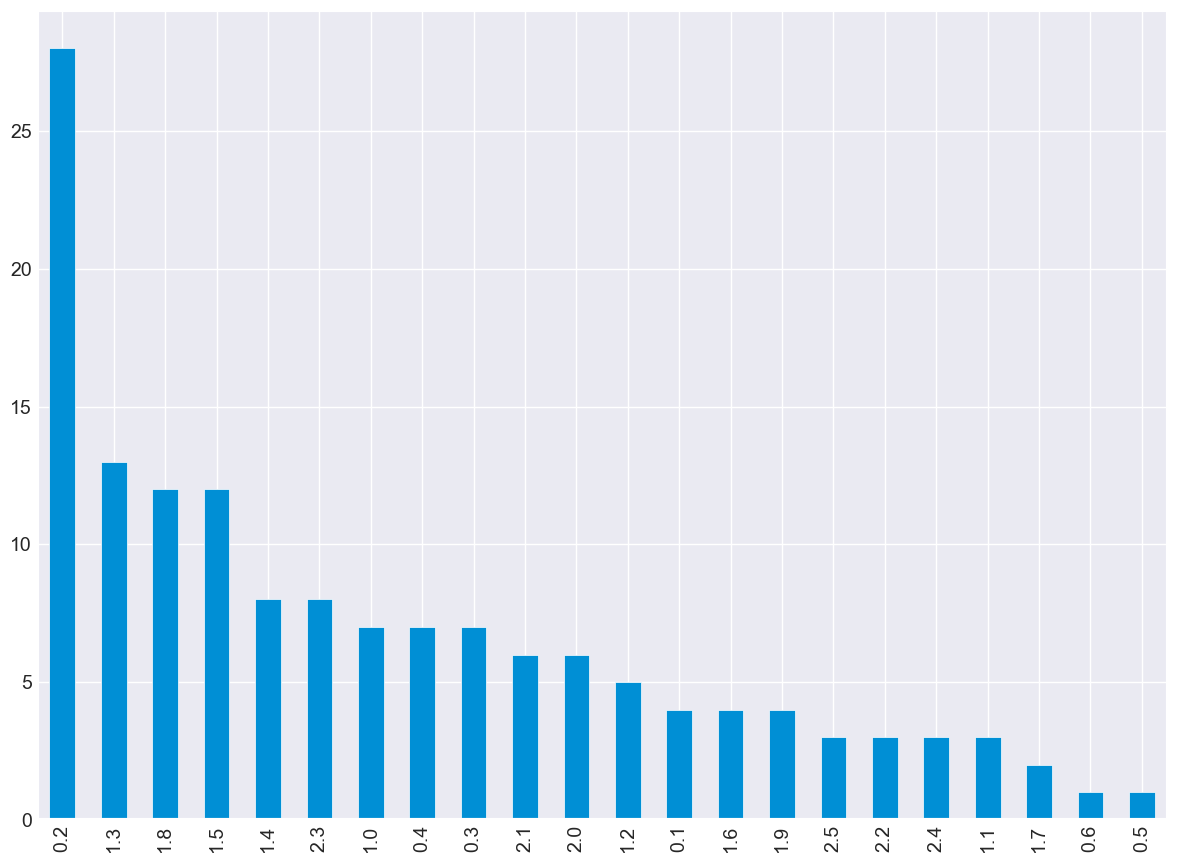

In [30]:
plt.figure(figsize=(13,10))
print(df['PetalWidthCm'].value_counts().to_frame())
df['PetalWidthCm'].value_counts().plot.bar()
plt.show()

In [31]:
#SepalLengthCm

df['SepalLengthCm'].nunique()

35

In [32]:
df['SepalLengthCm'].value_counts().to_frame()

,SepalLengthCm
5.0,10
5.1,9
6.3,9
6.7,8
5.7,8
5.5,7
6.4,7
5.8,6
5.4,6
6.1,6


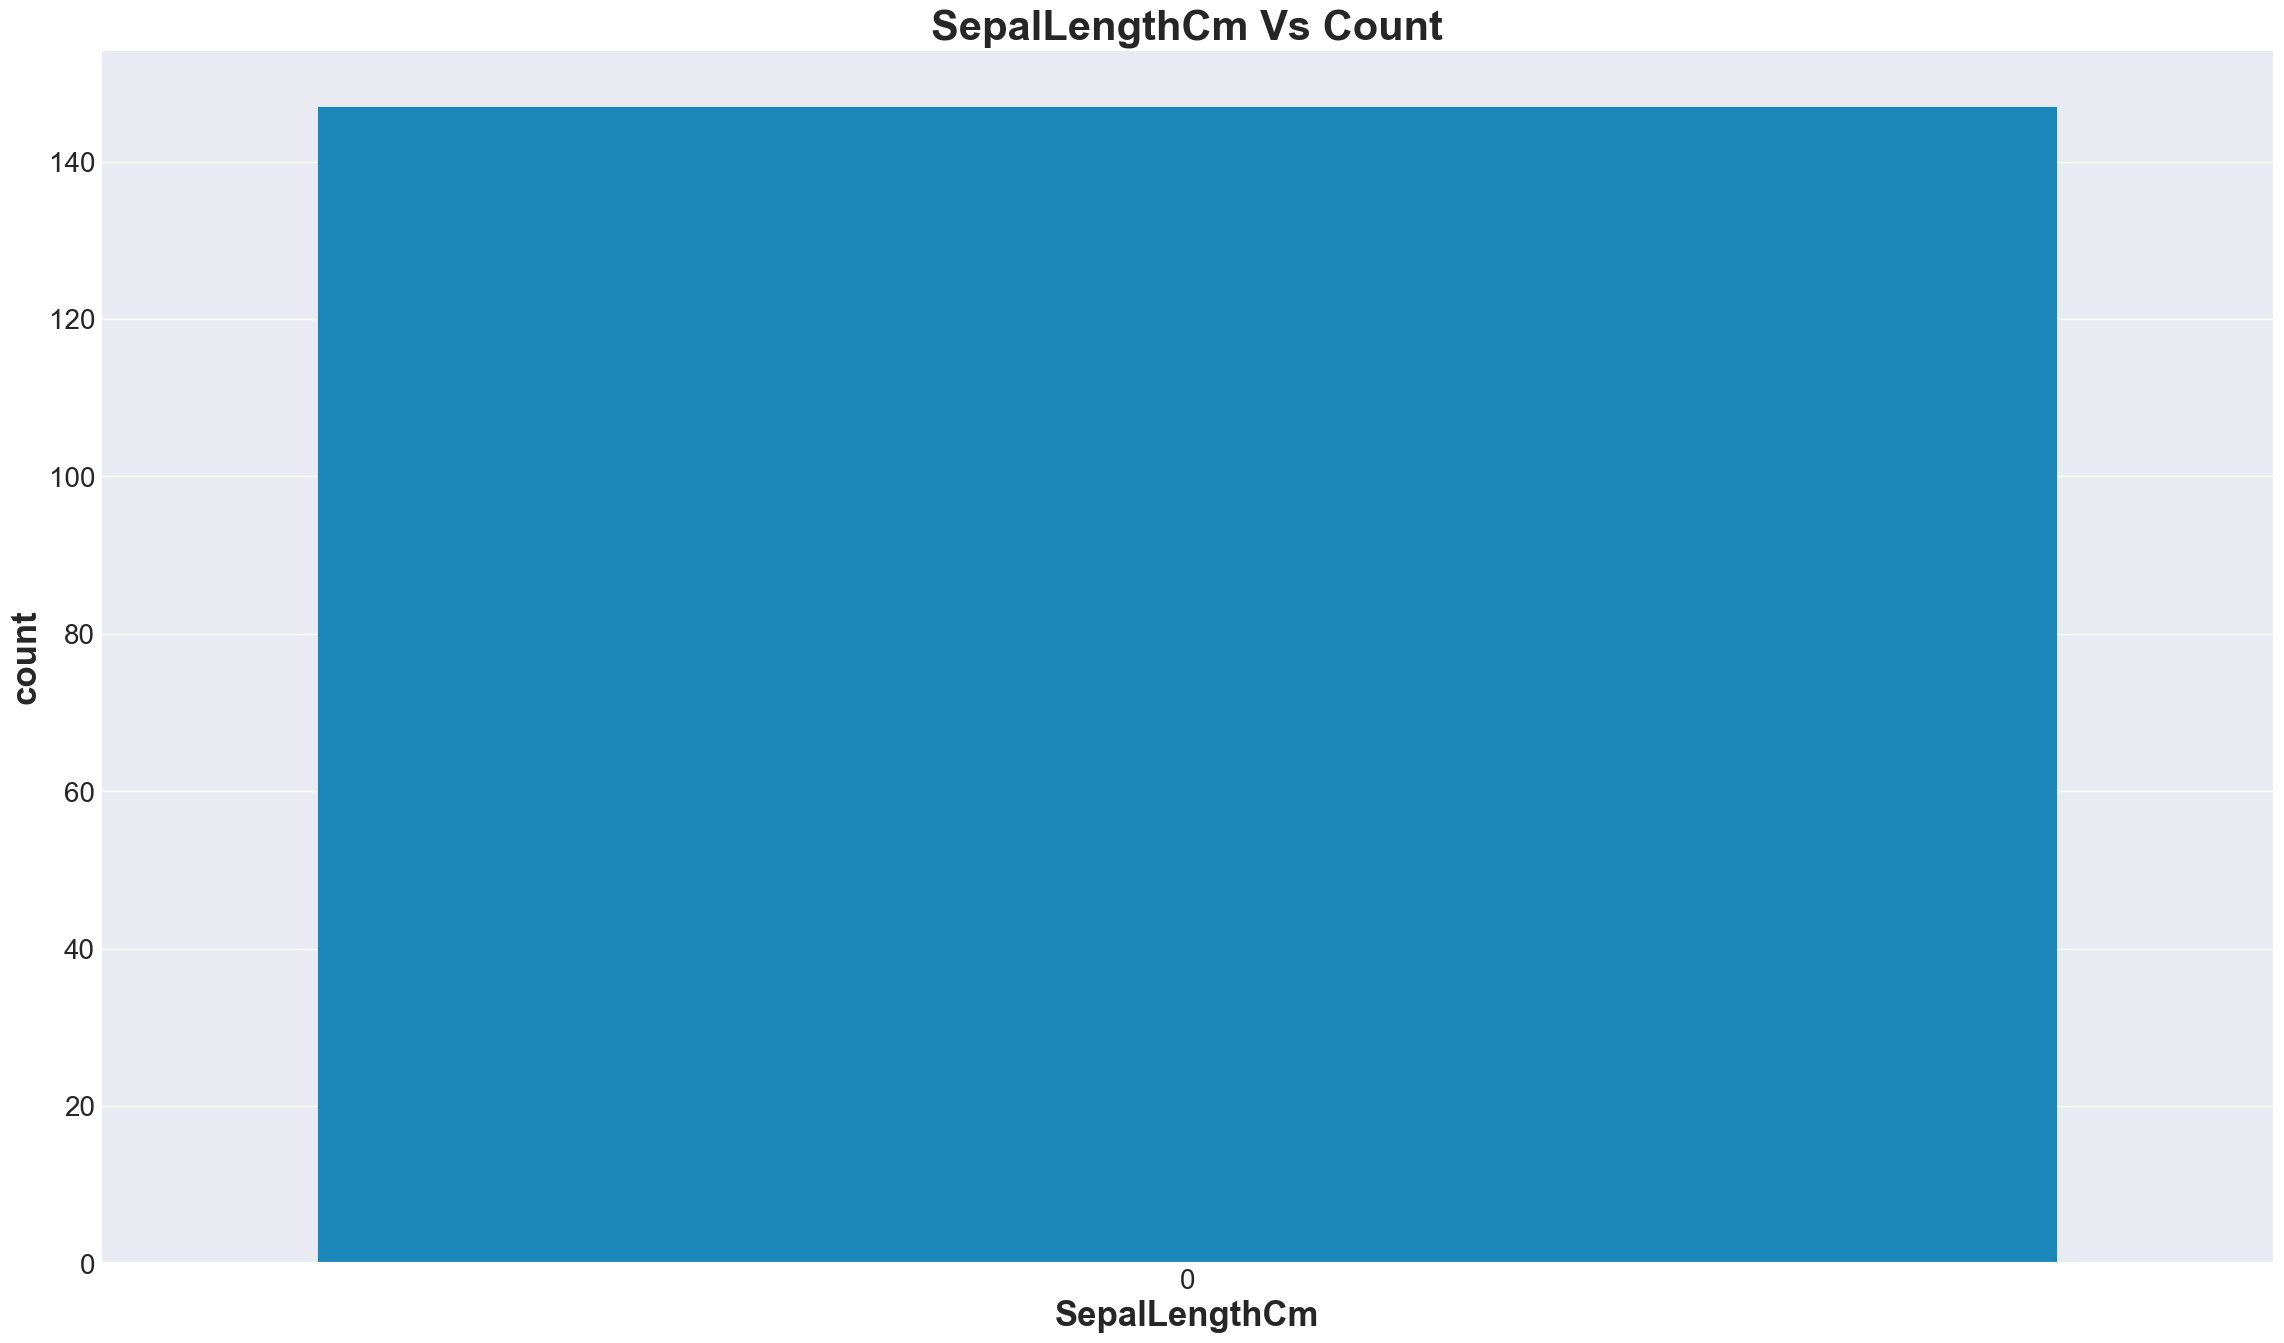

In [33]:
plt.figure(figsize=(25,15))

sns.countplot(df['SepalLengthCm'])

plt.xlabel('SepalLengthCm', fontsize=25, fontweight='bold')
plt.ylabel('count', fontsize=25, fontweight='bold')

plt.title('SepalLengthCm Vs Count', fontsize=30, fontweight='bold')

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

In [34]:
#SepalWidthCm

df['SepalWidthCm'].nunique()

23

     SepalWidthCm
3.0            26
2.8            14
3.2            13
3.4            12
3.1            10
2.9            10
2.5             8
2.7             8
3.5             6
3.3             6
3.8             6
2.6             5
2.3             4
3.7             3
2.4             3
2.2             3
3.6             3
3.9             2
4.4             1
4.0             1
4.1             1
4.2             1
2.0             1


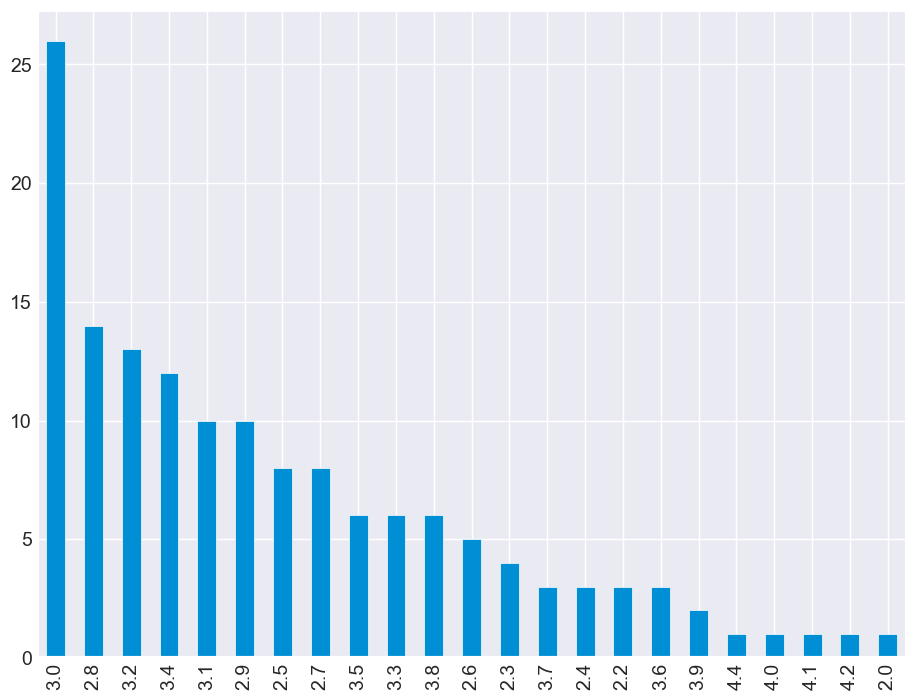

In [36]:
plt.figure(figsize=(10,8))
print(df['SepalWidthCm'].value_counts().to_frame())
df['SepalWidthCm'].value_counts().plot.bar()
plt.show()

In [36]:
#PetalLengthCm

df['PetalLengthCm'].nunique()

43

     PetalLengthCm
1.4             12
1.5             12
4.5              8
1.6              7
5.1              7
1.3              7
5.6              6
4.7              5
4.9              5
4.0              5
4.2              4
5.0              4
4.4              4
4.8              4
1.7              4
3.9              3
4.6              3
5.7              3
4.1              3
5.5              3
6.1              3
5.8              3
3.3              2
5.4              2
6.7              2
5.3              2
5.9              2
6.0              2
1.2              2
4.3              2
1.9              2
3.5              2
5.2              2
3.0              1
1.1              1
3.7              1
3.8              1
6.6              1
6.3              1
1.0              1
6.9              1
3.6              1
6.4              1


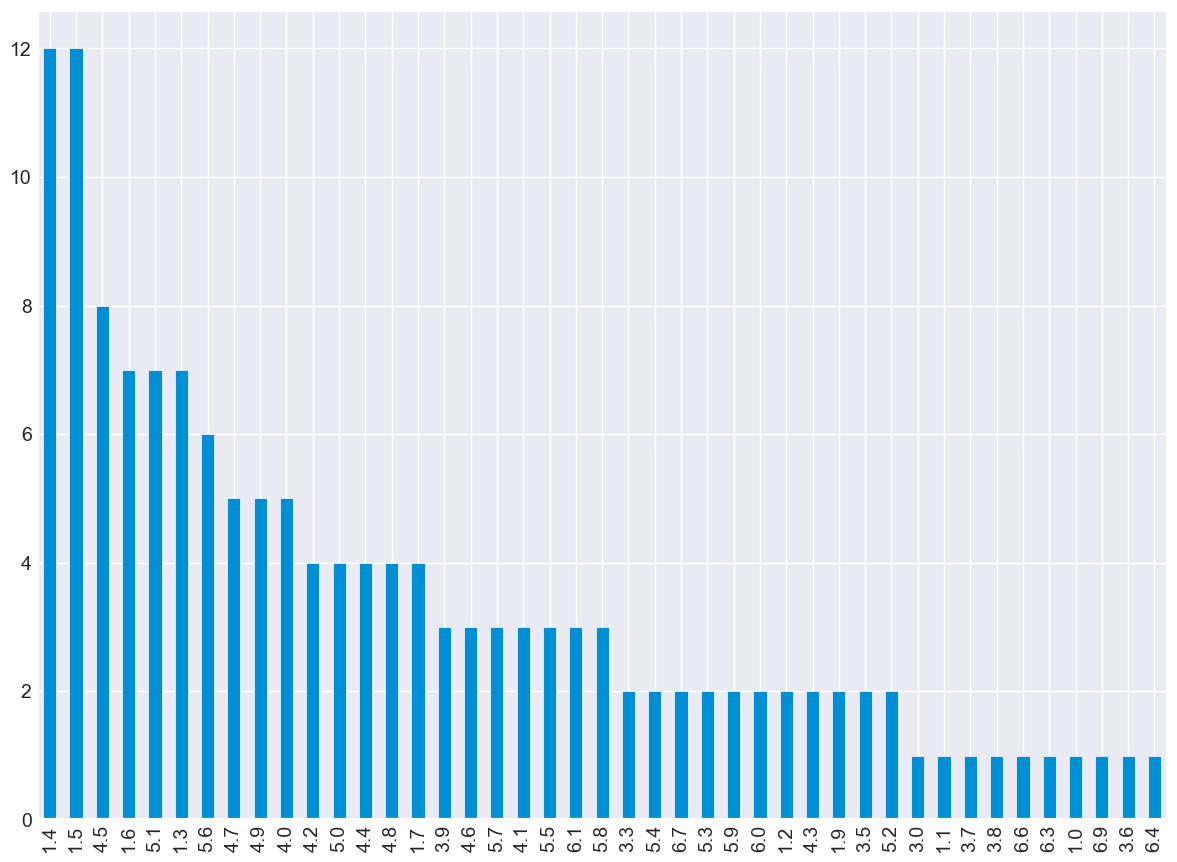

In [37]:
plt.figure(figsize=(13,10))
print(df['PetalLengthCm'].value_counts().to_frame())
df['PetalLengthCm'].value_counts().plot.bar()
plt.show()

In [38]:
#Species

df['Species'].nunique()

3

In [39]:
df['Species'].unique().tolist()

['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

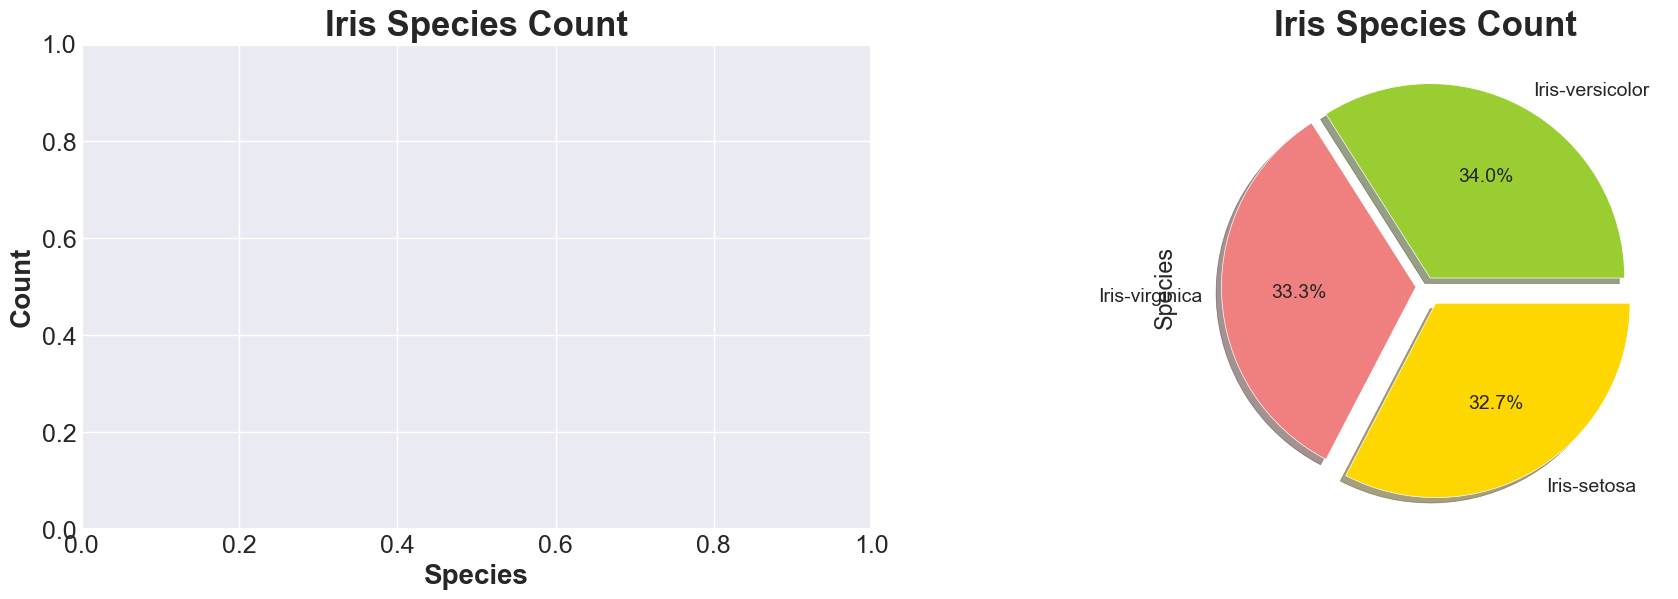

In [40]:
plt.figure(figsize=(20, 6))

cols = ['yellowgreen', 'lightcoral','gold']
plt.subplot(1,2,1)
plt.title('Iris Species Count',fontweight="bold", size=25)
plt.xticks(size=18)
plt.yticks(size=18)
plt.xlabel('Species', fontsize=20, fontweight='bold')
plt.ylabel('Count', fontsize=20, fontweight='bold')

plt.subplot(1,2,2)
df['Species'].value_counts().plot.pie(explode=[0.05,0.05,0.1],autopct='%1.1f%%',shadow=True, colors=cols)
plt.title('Iris Species Count',fontweight="bold", size=25)

plt.show()

<Figure size 1000x800 with 0 Axes>

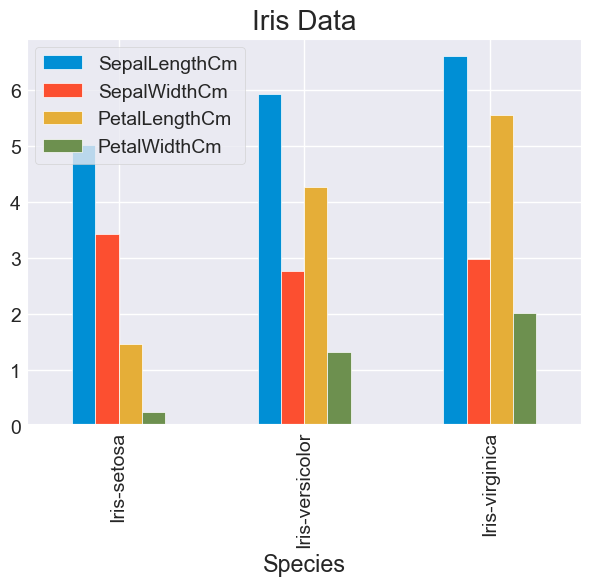

In [41]:
df_Species = df.groupby(df['Species']).mean()

plt.figure(figsize=(10,8))
df_Species.plot.bar()
plt.title('Iris Data')
plt.show()

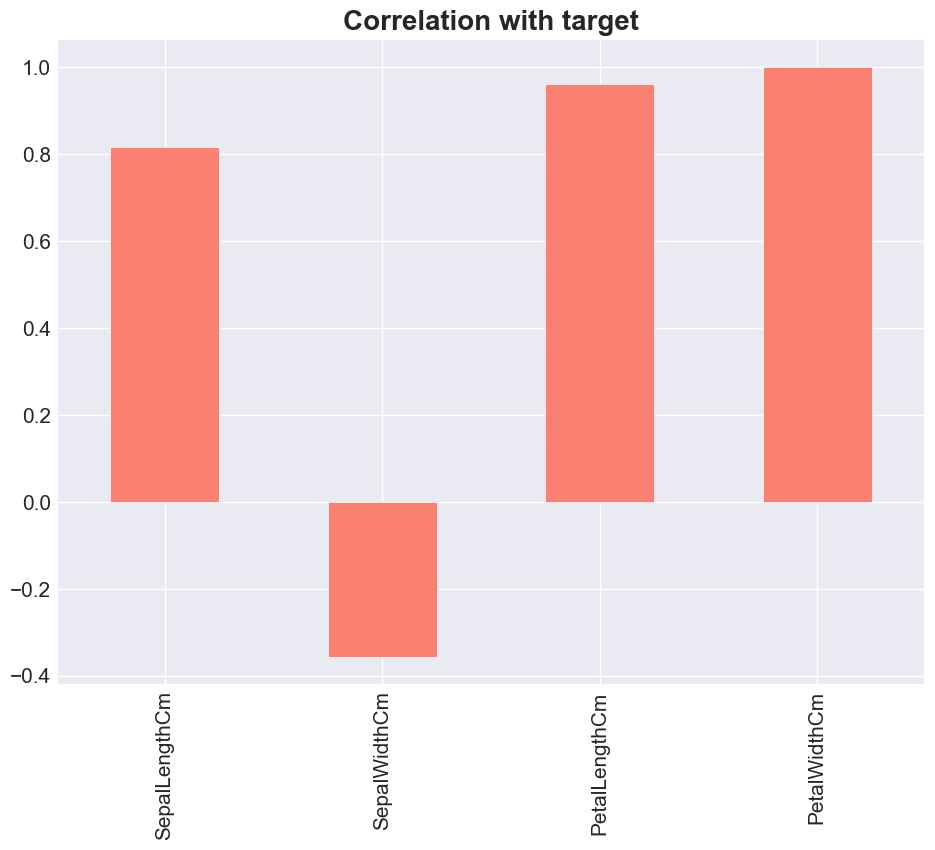

In [42]:
a = df.drop('Species', axis=1)
a.corrwith(df['PetalWidthCm']).plot(kind='bar', grid=True, figsize=(10,8), color='salmon')
plt.title("Correlation with target", fontweight='bold', size=20)
plt.xticks(size=15, rotation=90)
plt.yticks(size=15)
plt.show()

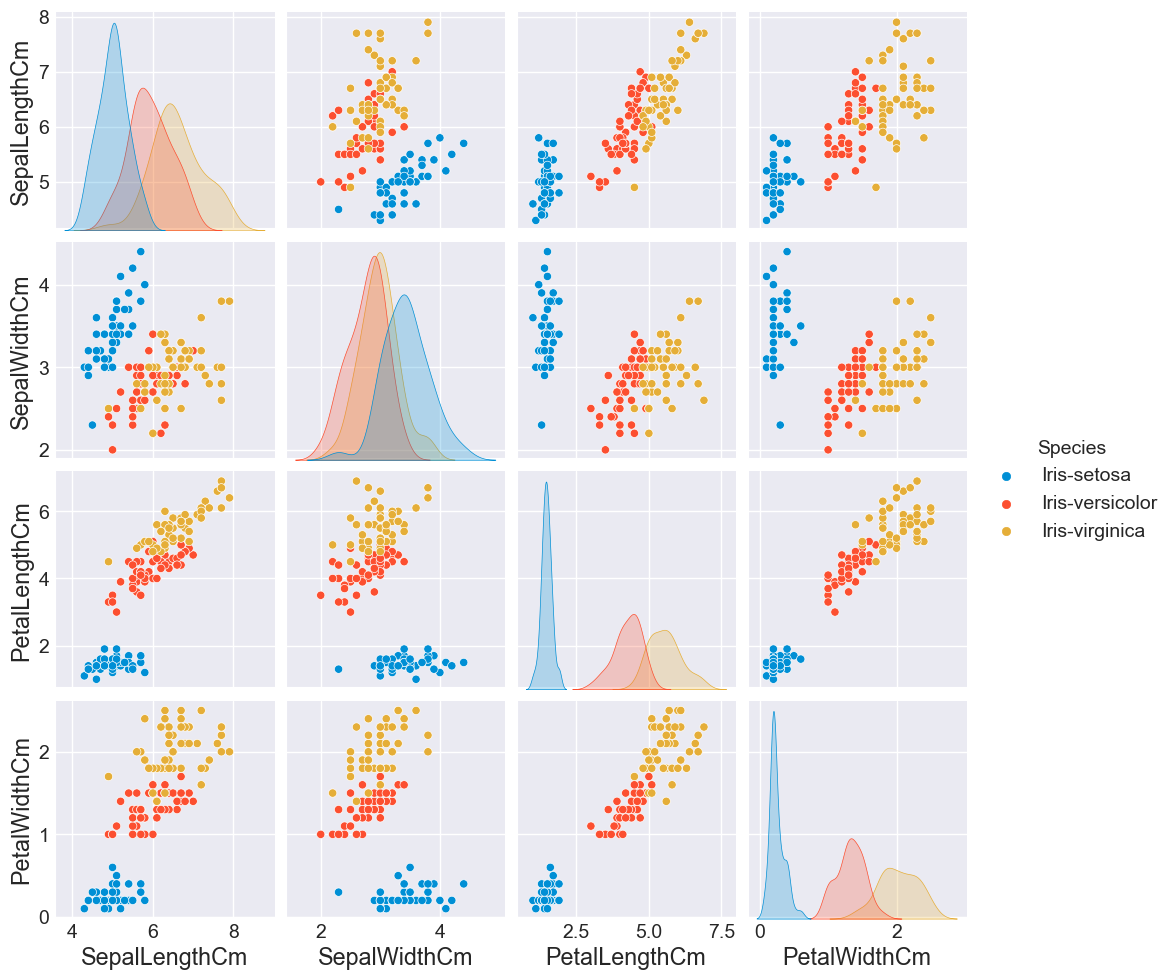

In [43]:
# Multivariate Analysis
# Pairplot
# Visualize the whole dataset

sns.pairplot(df,hue="Species")
plt.show()

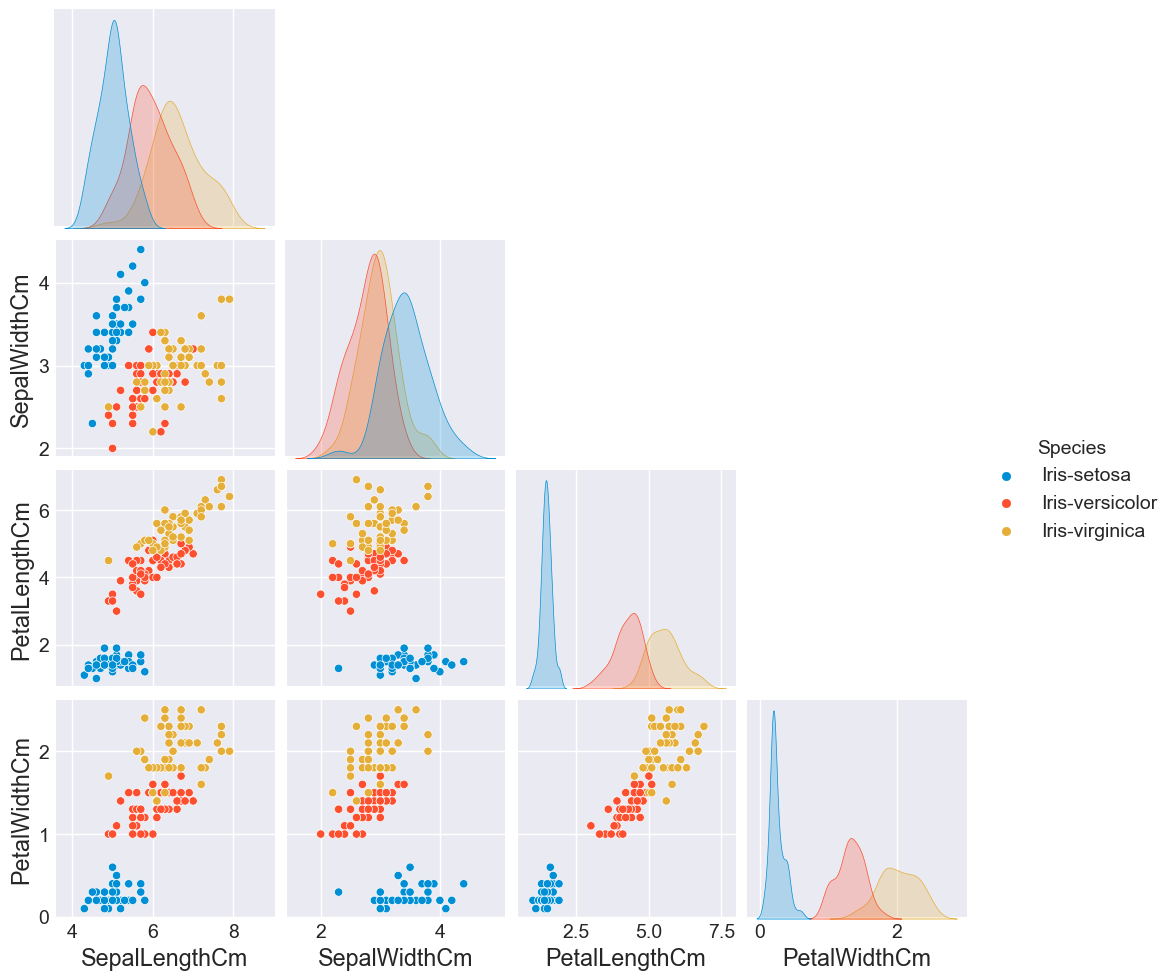

In [44]:
# Pairplot
sns.pairplot(df, hue='Species', corner=True)
plt.show()

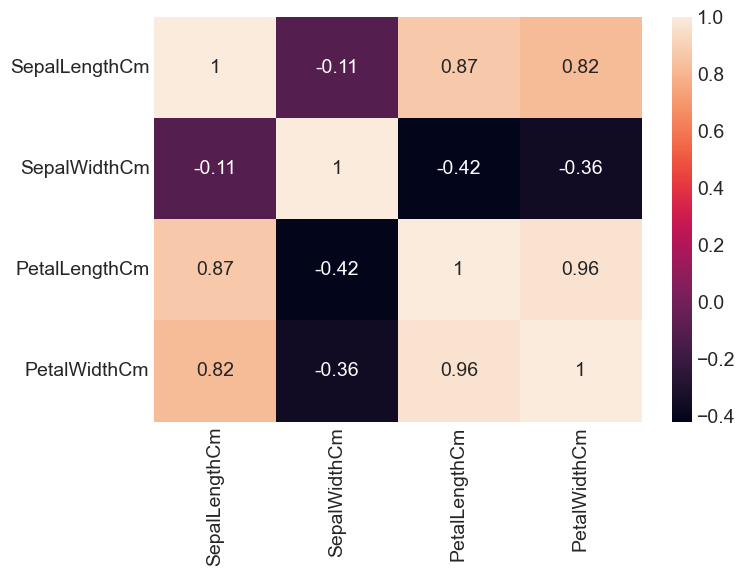

In [45]:
plt.figure(figsize=(7,5))
# Plotting the heatmap
sns.heatmap(df.corr(), annot=True)
plt.show()

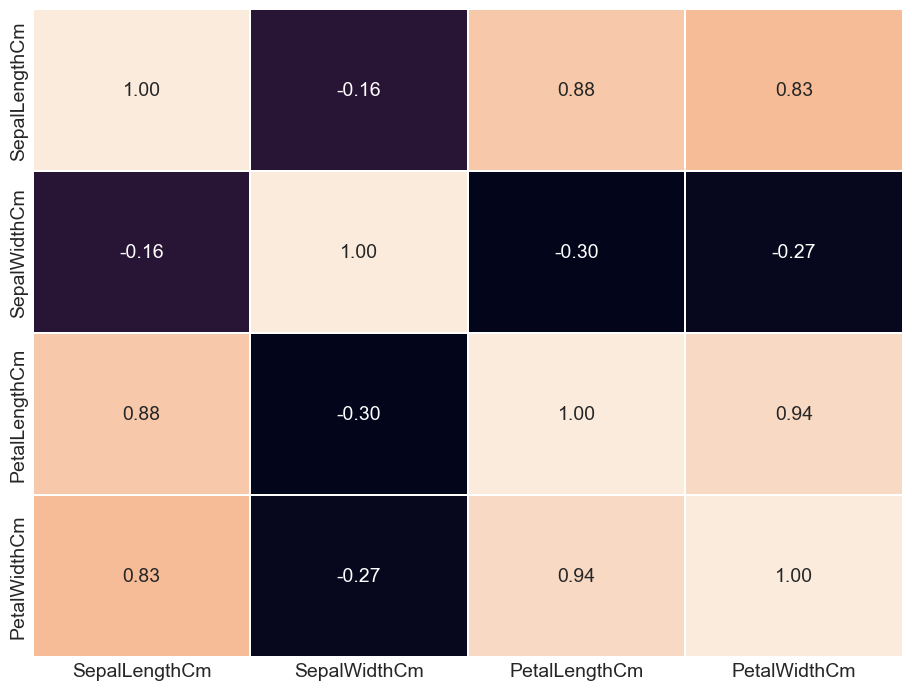

In [46]:
# Spearman Correlation
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(method='spearman'), cbar=False, annot=True, fmt='.2f', linewidth=0.2);

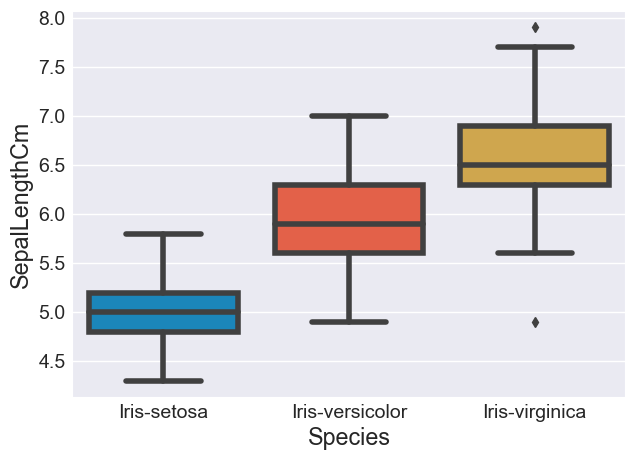

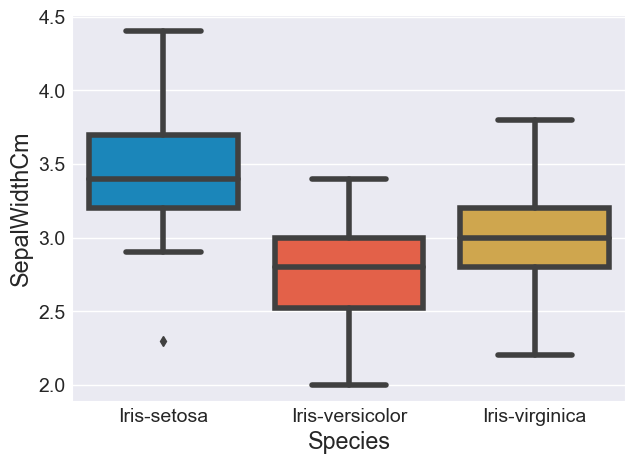

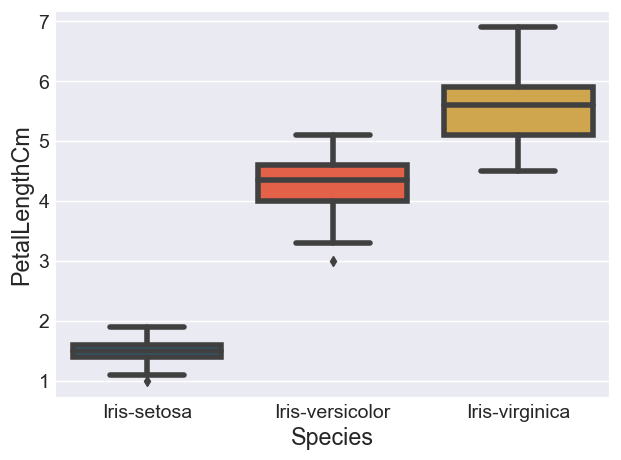

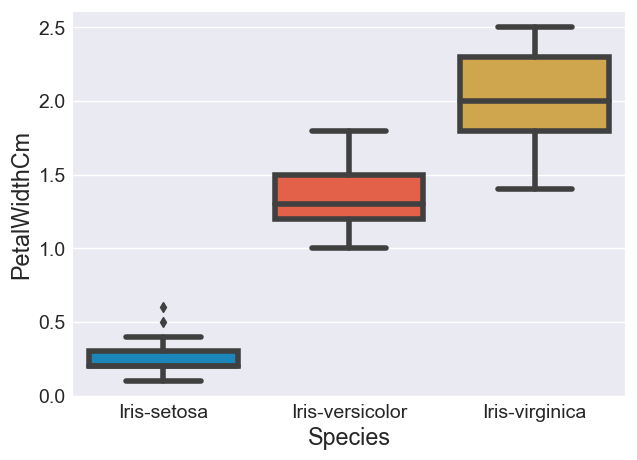

In [47]:
# Plotting the boxplot
sns.boxplot(x='Species', y='SepalLengthCm', data=df)
plt.show()

sns.boxplot(x='Species', y='SepalWidthCm', data=df)
plt.show()

sns.boxplot(x='Species', y='PetalLengthCm', data=df)
plt.show()

sns.boxplot(x='Species', y='PetalWidthCm', data=df)
plt.show()

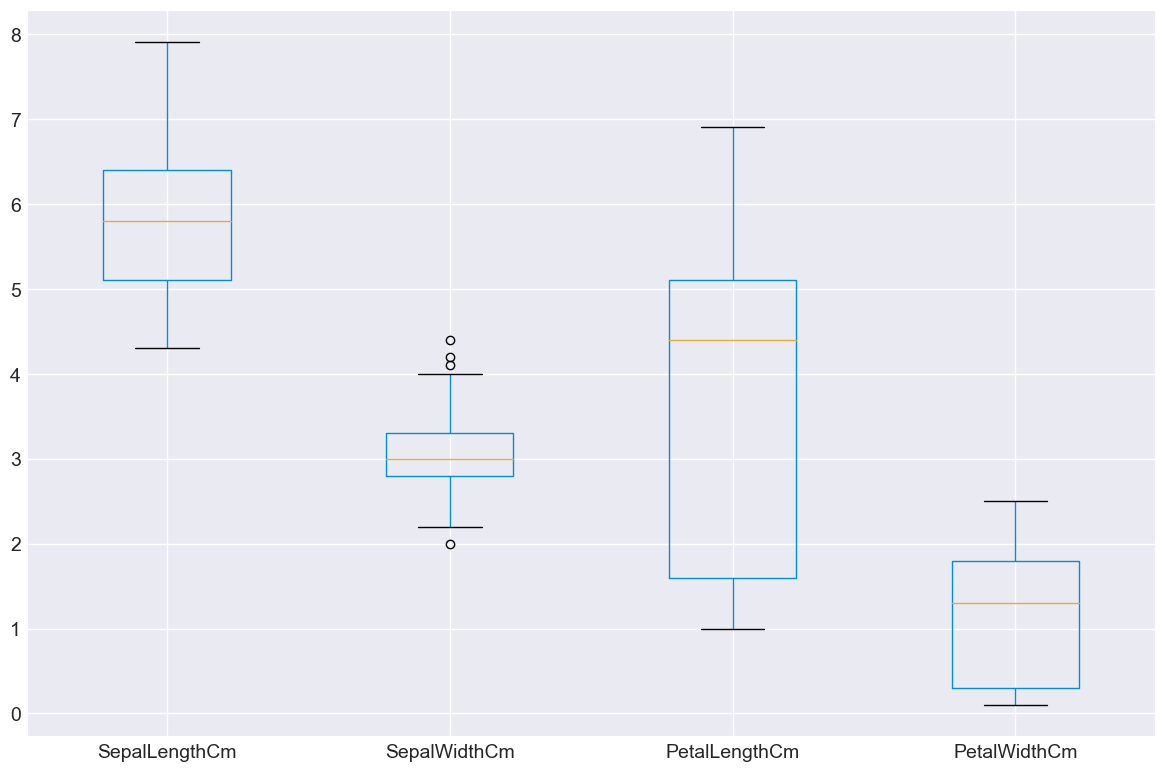

In [48]:
plt.figure(figsize = (13, 9)) 
df.boxplot()
plt.show()

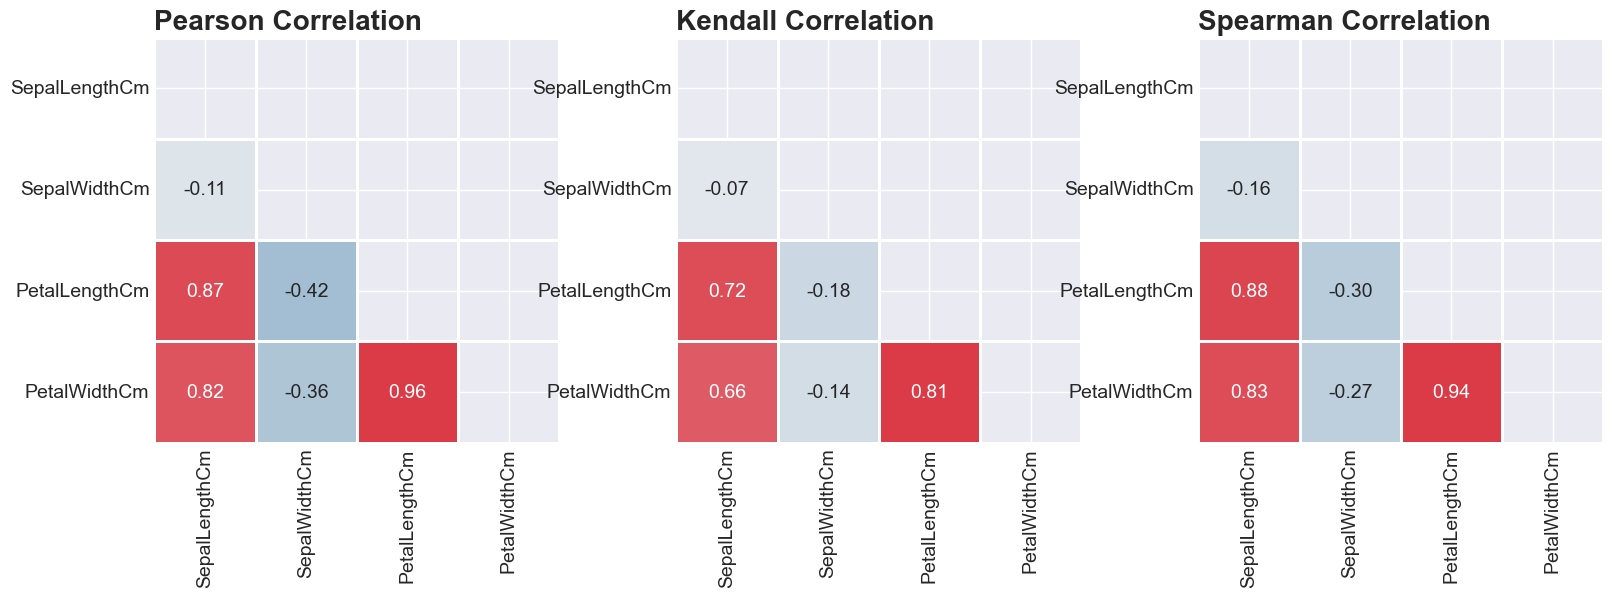

In [49]:
# kendall
fig, ax = plt.subplots(1, 3, figsize=(17 , 5))

feature_lst = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

corr = df[feature_lst].corr()

mask = np.zeros_like(corr, dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True


for idx, method in enumerate(['pearson', 'kendall', 'spearman']):
    sns.heatmap(df[feature_lst].corr(method=method), ax=ax[idx],
            square=True, annot=True, fmt='.2f', center=0, linewidth=2,
            cbar=False, cmap=sns.diverging_palette(240, 10, as_cmap=True),
            mask=mask
           ) 
    ax[idx].set_title(f'{method.capitalize()} Correlation', loc='left', fontweight='bold')     

plt.show()

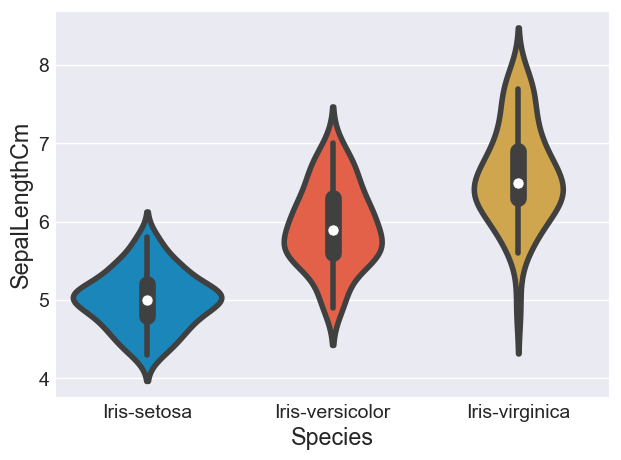

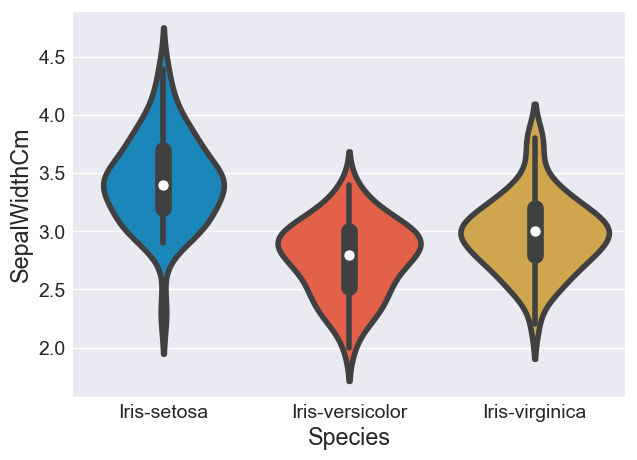

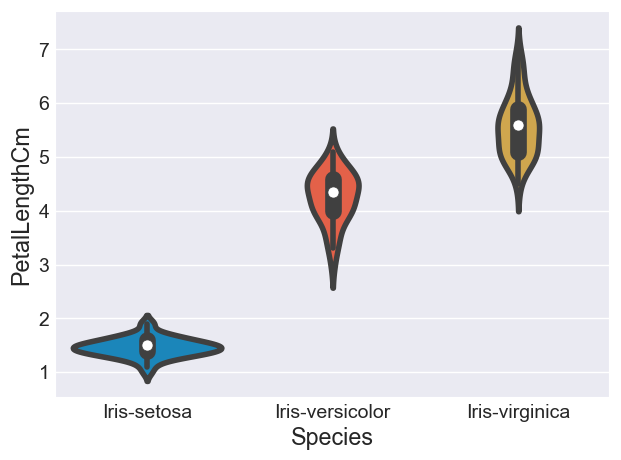

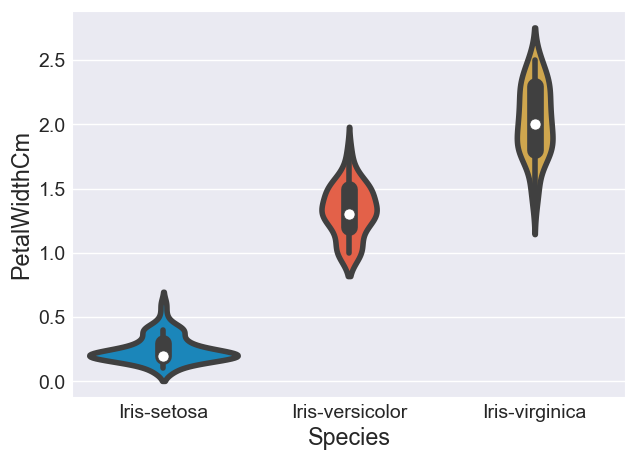

In [50]:
# Plotting the violinplot
sns.violinplot(x='Species', y='SepalLengthCm', data=df)
plt.show()

sns.violinplot(x='Species', y='SepalWidthCm', data=df)
plt.show()

sns.violinplot(x='Species', y='PetalLengthCm', data=df)
plt.show()

sns.violinplot(x='Species', y='PetalWidthCm', data=df)
plt.show()

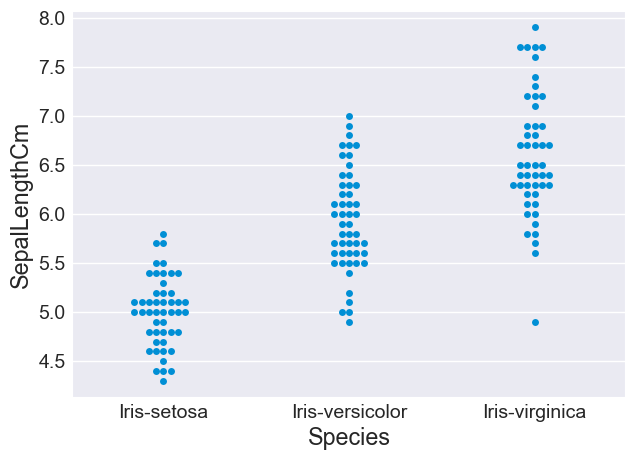

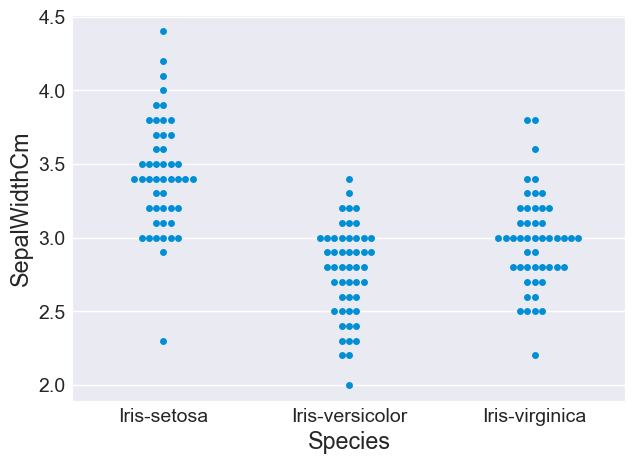

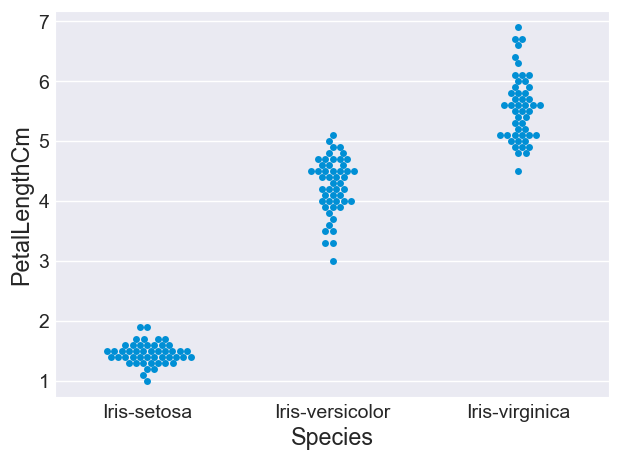

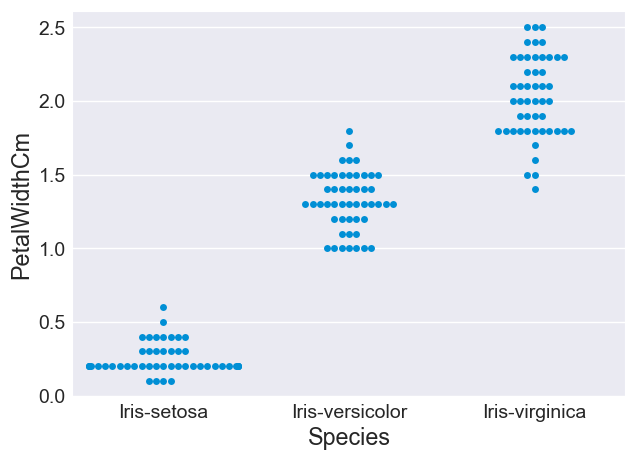

In [51]:
# Plotting the swarmplot
sns.swarmplot(x='Species', y='SepalLengthCm', data=df)
plt.show()
sns.swarmplot(x='Species', y='SepalWidthCm', data=df)
plt.show()
sns.swarmplot(x='Species', y='PetalLengthCm', data=df)
plt.show()
sns.swarmplot(x='Species', y='PetalWidthCm', data=df)
plt.show()

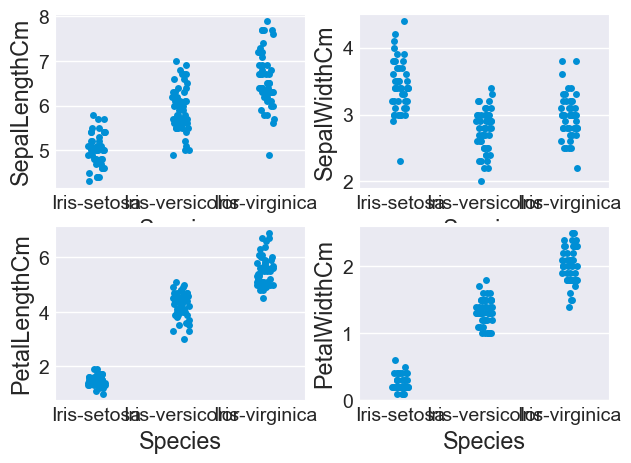

In [52]:
# Plotting the stripplot
# Create a figure with 4 subplots
fig, ax = plt.subplots(2, 2)

# Plot the first stripplot in the top left subplot
sns.stripplot(x='Species', y='SepalLengthCm', data=df, ax=ax[0, 0])

# Plot the second stripplot in the top right subplot
sns.stripplot(x='Species', y='SepalWidthCm', data=df, ax=ax[0, 1])

# Plot the third stripplot in the bottom left subplot
sns.stripplot(x='Species', y='PetalLengthCm', data=df, ax=ax[1, 0])

# Plot the fourth stripplot in the bottom right subplot
sns.stripplot(x='Species', y='PetalWidthCm', data=df, ax=ax[1, 1])

plt.show()

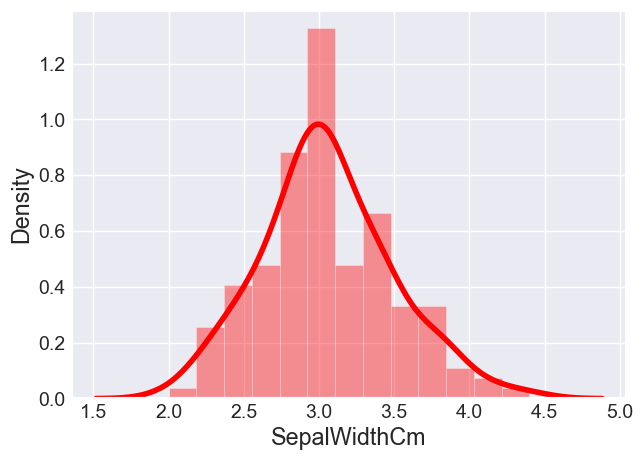

In [53]:
#Univariate Analysis

sns.distplot(df.SepalWidthCm, color = 'red')
plt.show()

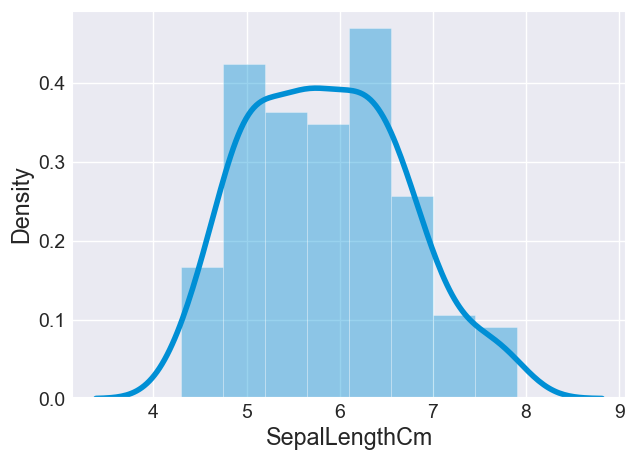

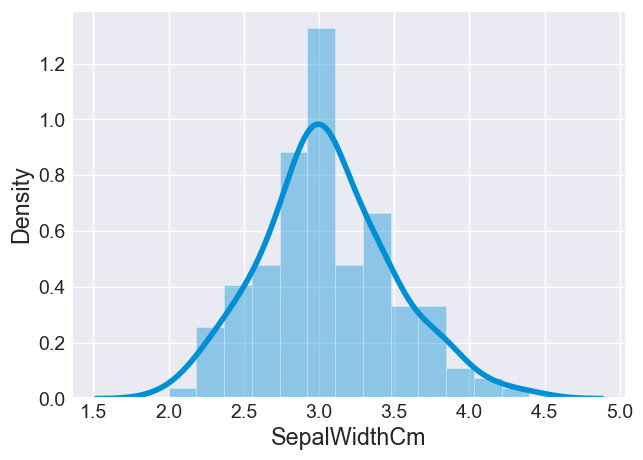

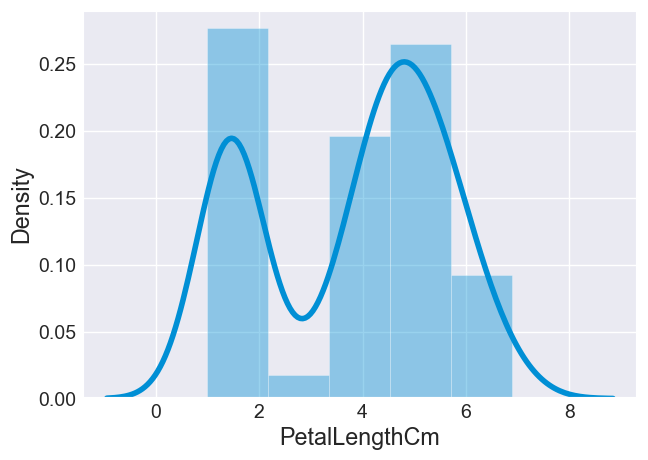

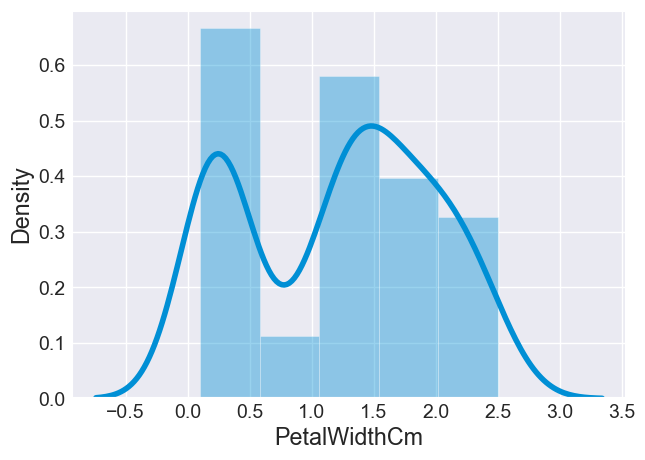

In [54]:
# Plotting the distplot
sns.distplot(df['SepalLengthCm'])
plt.show()

sns.distplot(df['SepalWidthCm'])
plt.show()

sns.distplot(df['PetalLengthCm'])
plt.show()

sns.distplot(df['PetalWidthCm'])
plt.show()

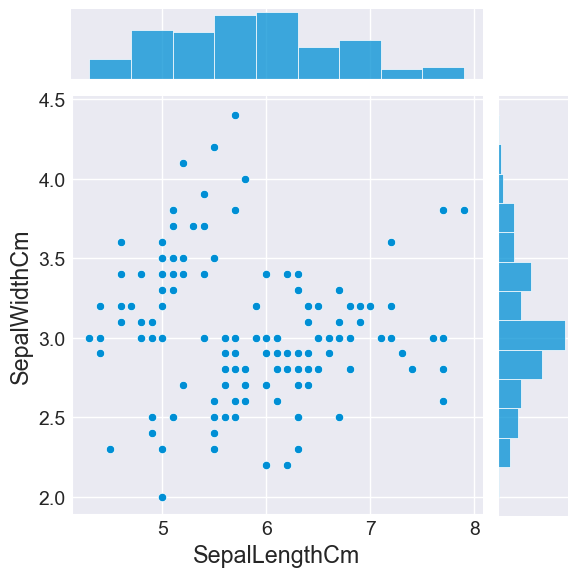

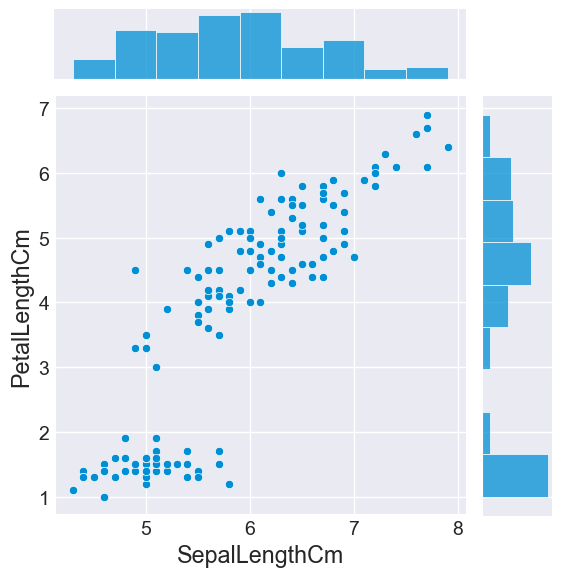

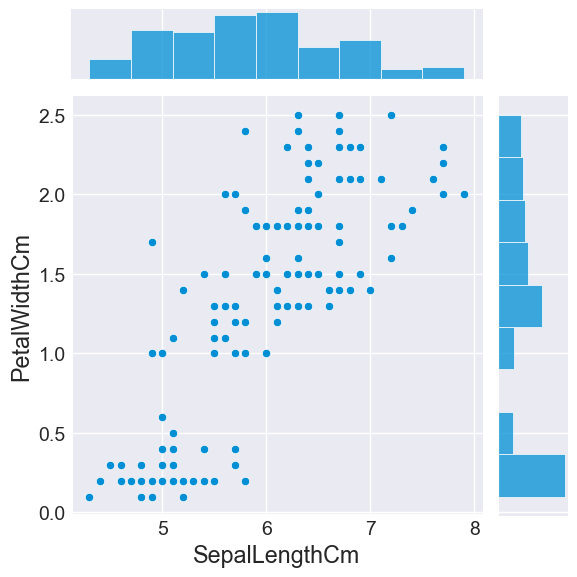

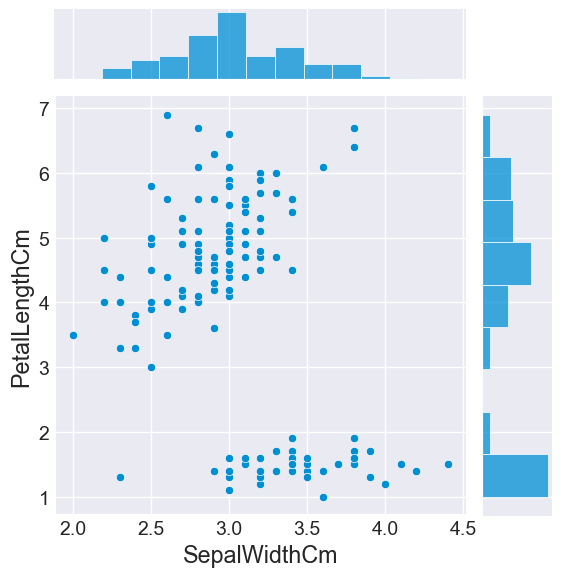

In [55]:
# Plotting the jointplot
sns.jointplot(x='SepalLengthCm', y='SepalWidthCm', data=df)
plt.show()

sns.jointplot(x='SepalLengthCm', y='PetalLengthCm', data=df)
plt.show()

sns.jointplot(x='SepalLengthCm', y='PetalWidthCm', data=df)
plt.show()

sns.jointplot(x='SepalWidthCm', y='PetalLengthCm', data=df)
plt.show()

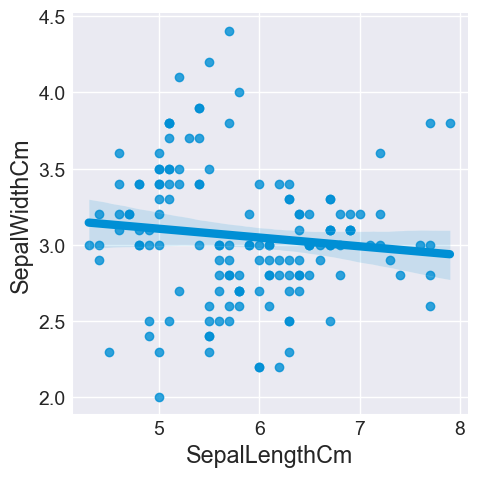

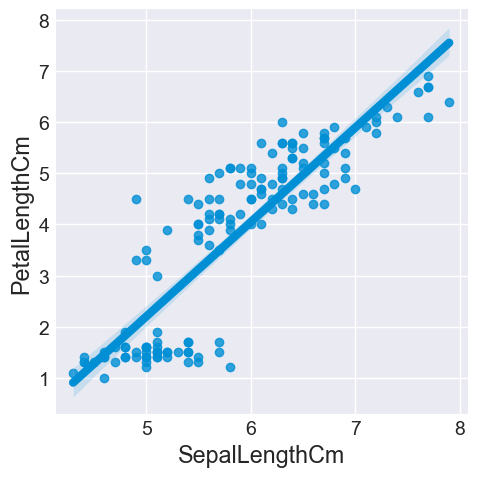

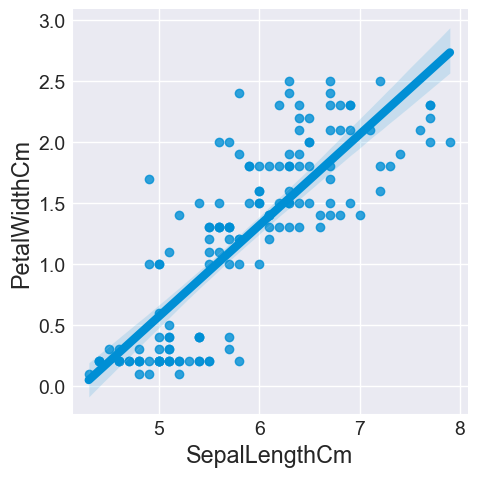

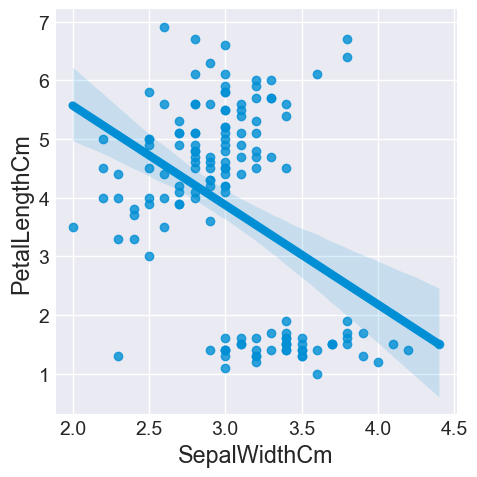

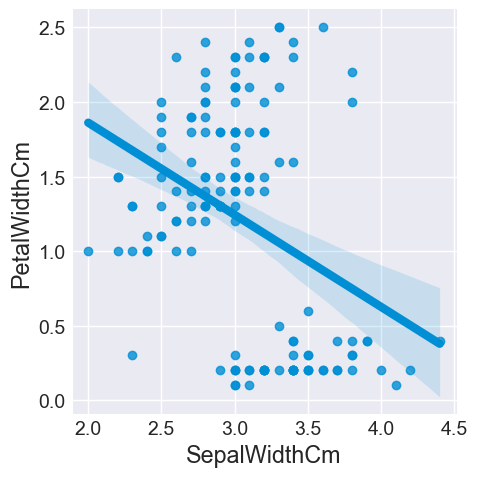

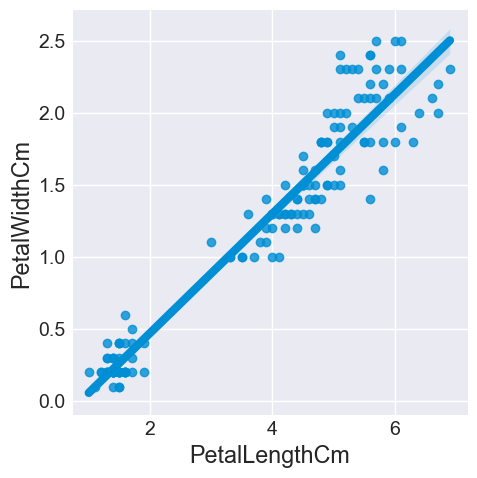

In [56]:
# Plotting the lmplot
sns.lmplot(x='SepalLengthCm', y='SepalWidthCm', data=df)

# Plotting the lmplot
sns.lmplot(x='SepalLengthCm', y='PetalLengthCm', data=df)

# Plotting the lmplot
sns.lmplot(x='SepalLengthCm', y='PetalWidthCm', data=df)

# Plotting the lmplot
sns.lmplot(x='SepalWidthCm', y='PetalLengthCm', data=df)

# Plotting the lmplot
sns.lmplot(x='SepalWidthCm', y='PetalWidthCm', data=df)

# Plotting the lmplot
sns.lmplot(x='PetalLengthCm', y='PetalWidthCm', data=df)

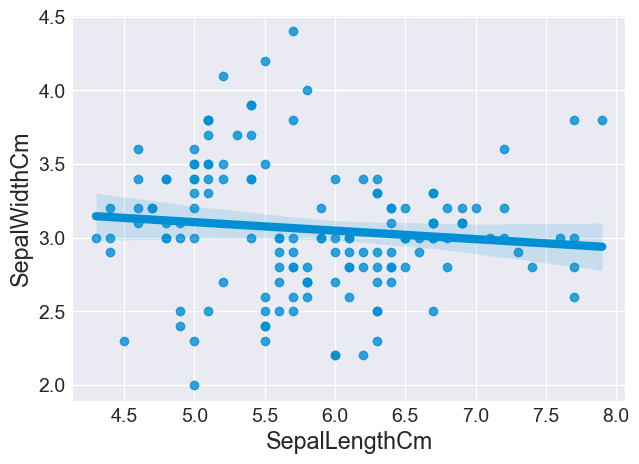

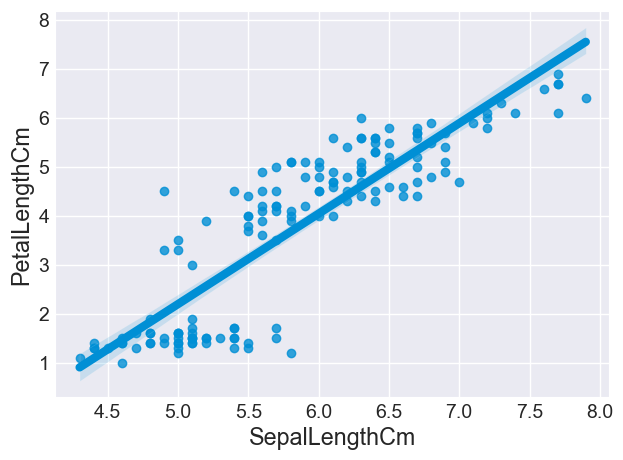

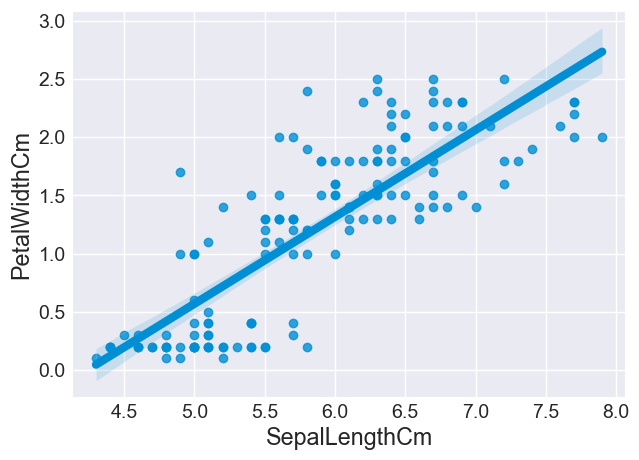

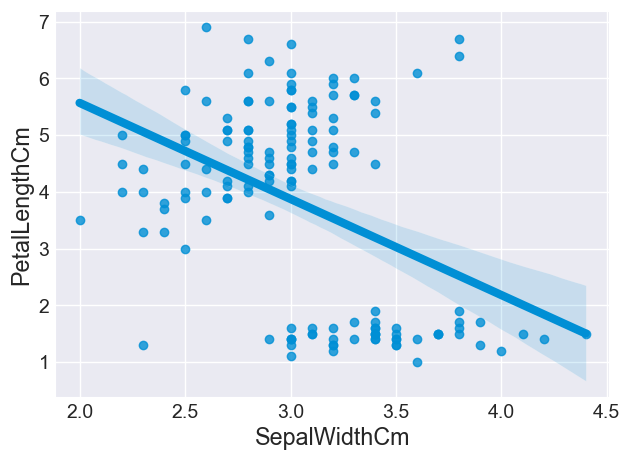

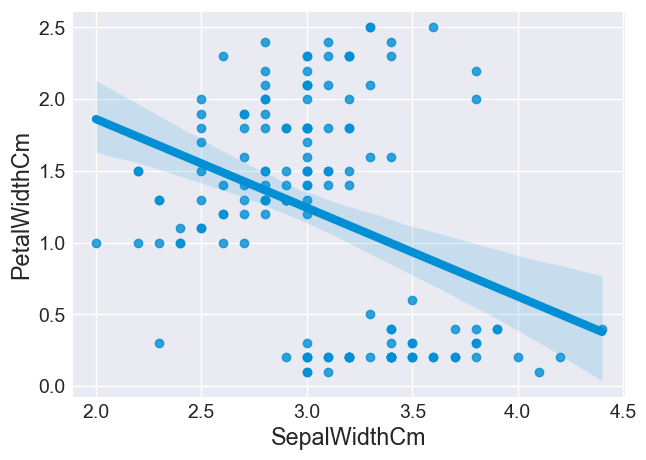

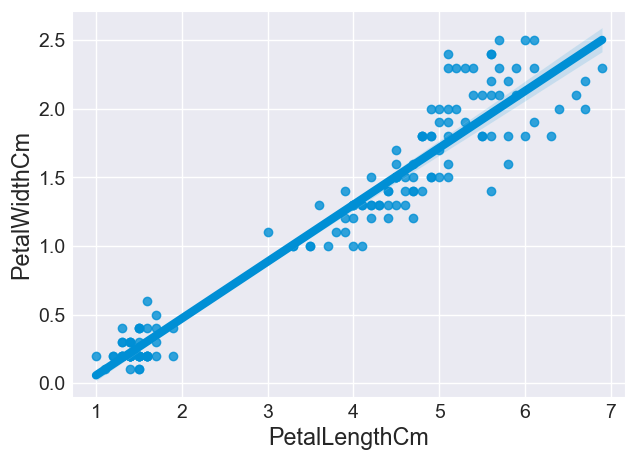

In [57]:
# Plotting the regplot
sns.regplot(x='SepalLengthCm', y='SepalWidthCm', data=df)
plt.show()

sns.regplot(x='SepalLengthCm', y='PetalLengthCm', data=df)
plt.show()

sns.regplot(x='SepalLengthCm', y='PetalWidthCm', data=df)
plt.show()

sns.regplot(x='SepalWidthCm', y='PetalLengthCm', data=df)
plt.show()

sns.regplot(x='SepalWidthCm', y='PetalWidthCm', data=df)
plt.show()

sns.regplot(x='PetalLengthCm', y='PetalWidthCm', data=df)
plt.show()

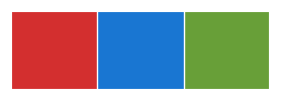

In [58]:
# Bivariate Analysis

# Setting color palette
colors = ['#D32F2F','#1976D2','#689F38']
sns.palplot(sns.color_palette(colors))

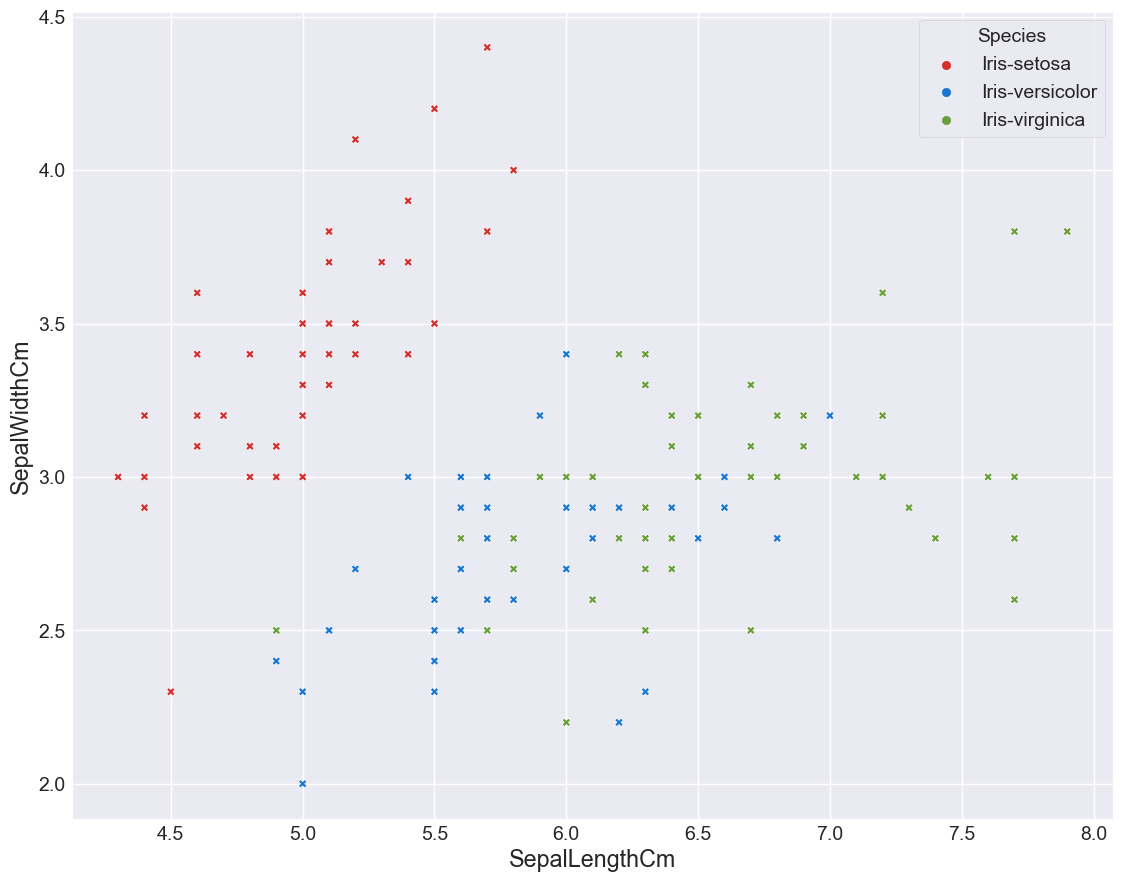

In [59]:
plt.figure(figsize=(12,10))
sns.scatterplot(x="SepalLengthCm", y="SepalWidthCm", hue="Species", data=df, palette=colors, marker="X")
plt.show()

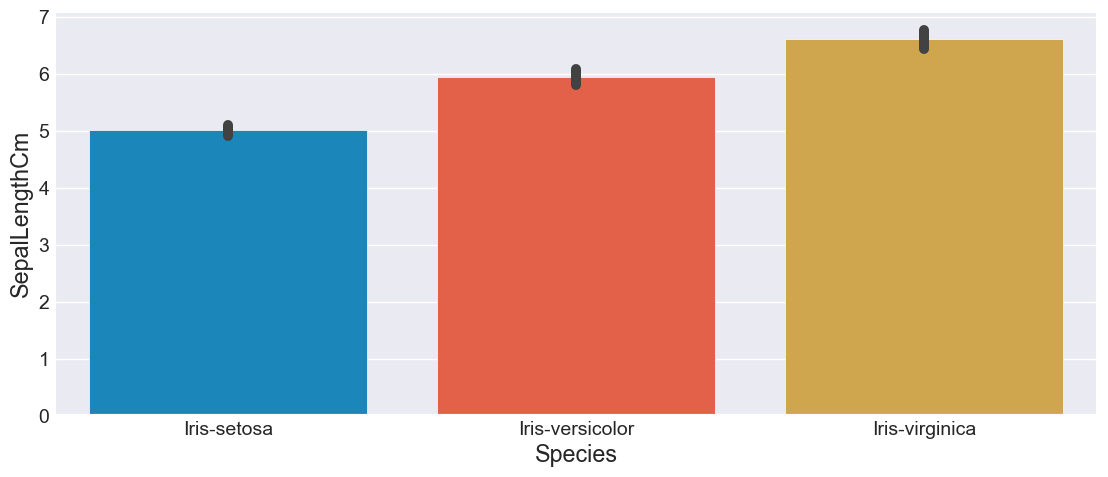

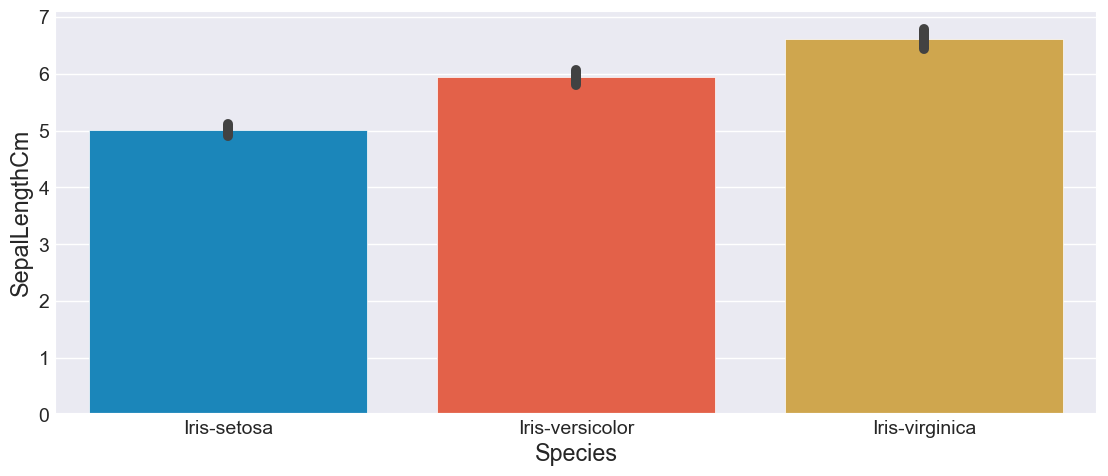

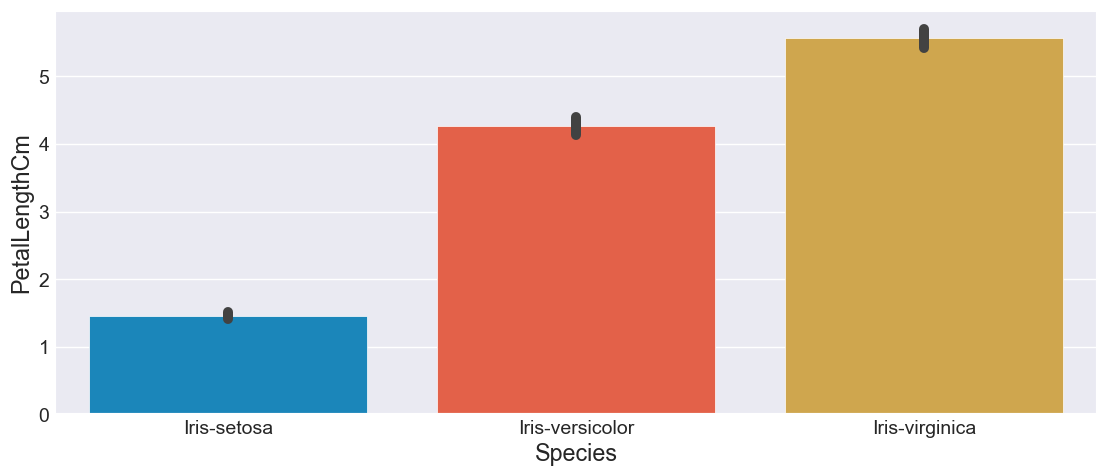

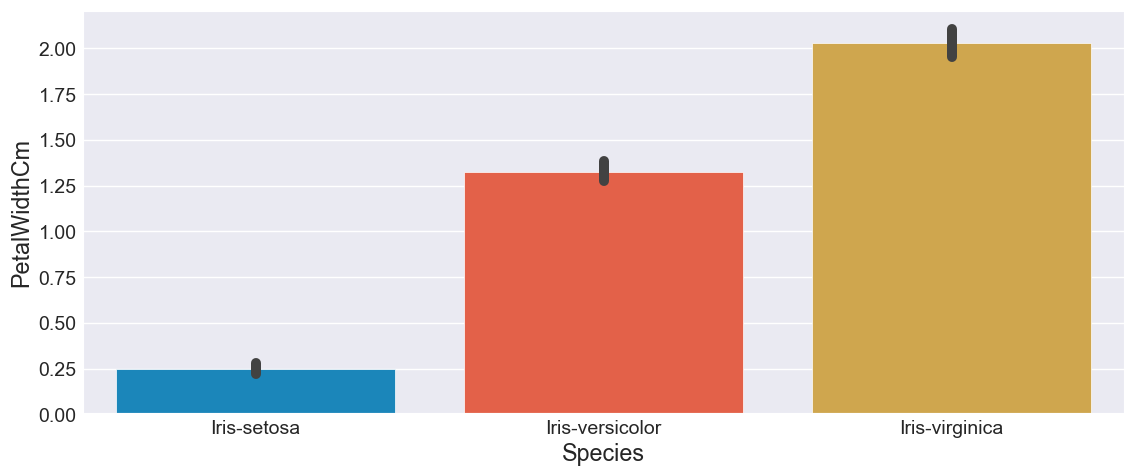

In [60]:
# Bar plot
plt.figure(figsize=(12,5))
sns.barplot(x=df['Species'],y=df['SepalLengthCm'],data=df)
plt.show()
#setosa has the shorter sepal lenght and virginica has longer

plt.figure(figsize=(12,5))
sns.barplot(x=df['Species'],y=df['SepalLengthCm'],data=df)
plt.show()
#setosa has the longer Sepalwidth and Versicolor has shorter Sepalwidth

plt.figure(figsize=(12,5))
sns.barplot(x=df['Species'],y=df['PetalLengthCm'],data=df)
plt.show()
#setosa has the shorter Petallength and Virginica has longer Petallength

plt.figure(figsize=(12,5))
sns.barplot(x=df['Species'],y=df['PetalWidthCm'],data=df)
plt.show()
#setosa has the shorter Petalwidth and Virginica has longer Petalwidth

In [62]:
# Modeling

# independent variable
x = df.drop(['Species'],axis=1)

# dependent variable
y = df['Species']

In [63]:
# split the data into train and test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0,test_size=0.2)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(117, 4) (30, 4) (117,) (30,)


In [64]:
#KNN (K Nearest Neighbors)

list_1=[]
for i in range(1,21):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    preds = knn.predict(x_test)
    scores = accuracy_score(y_test,preds)
    list_1.append(scores)
knn = KNeighborsClassifier(n_neighbors=3)
pca = PCA(n_components = 2)
X_train2 = pca.fit_transform(x_train)

knn.fit(X_train2, y_train)

KNeighborsClassifier(n_neighbors=3)

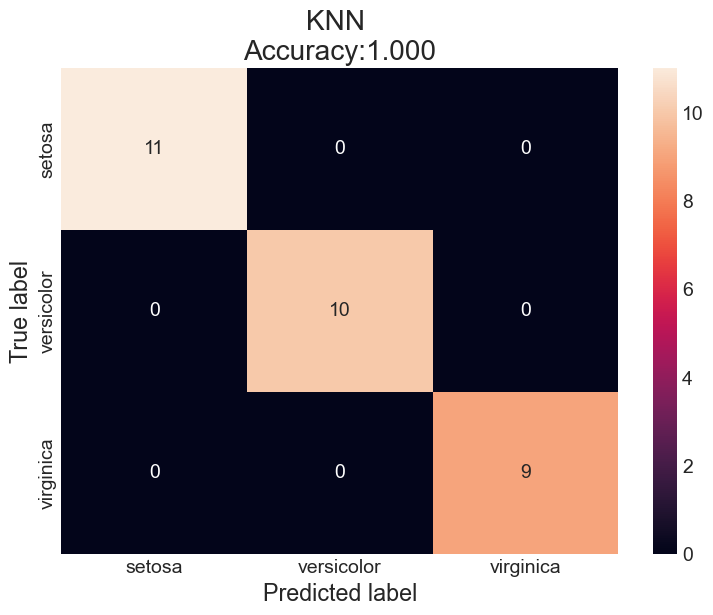

In [65]:
# Creates a confusion matrix
cm = confusion_matrix(y_test, preds)

cm_df = pd.DataFrame(cm,
                     index = ['setosa','versicolor','virginica'], 
                     columns = ['setosa','versicolor','virginica'])

plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True)
plt.title('KNN \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, preds)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [66]:
print(accuracy_score(y_test, preds))
print('\n')
print(confusion_matrix(y_test, preds))
print('\n')
print(classification_report(y_test, preds)) 

1.0


[[11  0  0]
 [ 0 10  0]
 [ 0  0  9]]


                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        10
 Iris-virginica       1.00      1.00      1.00         9

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [67]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)
print('Test Accuracy for Scikit-Learn model:', accuracy_score(y_test, y_pred)* 100,'%')

Test Accuracy for Scikit-Learn model: 100.0 %


In [68]:
# Evaluate the performance of the model on the test data
f1 = f1_score(y_test, y_pred, average='micro')
print("F1 score:", f1)

F1 score: 1.0


Feature: 0, Score: -0.39618
Feature: 1, Score: 0.85120
Feature: 2, Score: -2.33866
Feature: 3, Score: -0.98246


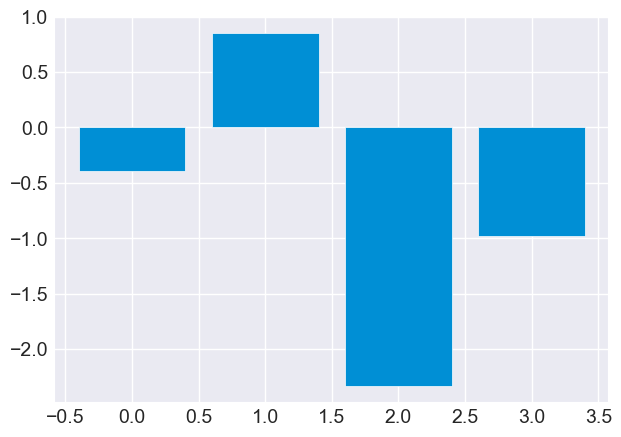

In [69]:
importance = logreg.coef_[0]

# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [70]:
print(accuracy_score(y_test, y_pred))
print('\n')
print(confusion_matrix(y_test, y_pred))
print('\n')
print(classification_report(y_test, y_pred))

1.0


[[11  0  0]
 [ 0 10  0]
 [ 0  0  9]]


                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        10
 Iris-virginica       1.00      1.00      1.00         9

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



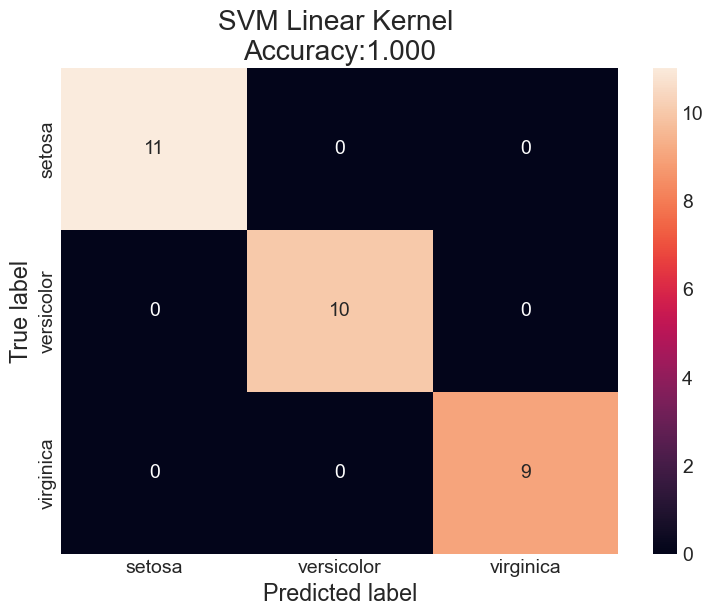

In [71]:
# confusion matrix
cm = confusion_matrix(y_test, y_pred)

cm_df = pd.DataFrame(cm,
                     index = ['setosa','versicolor','virginica'], 
                     columns = ['setosa','versicolor','virginica'])

plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True)
plt.title('SVM Linear Kernel \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_pred)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [72]:
#Random Forest Classifier

clf = RandomForestClassifier()

# train the classifier using the training data
clf.fit(x_train, y_train)

RandomForestClassifier()

Feature: 0, Score: 0.08370
Feature: 1, Score: 0.02933
Feature: 2, Score: 0.43879
Feature: 3, Score: 0.44818


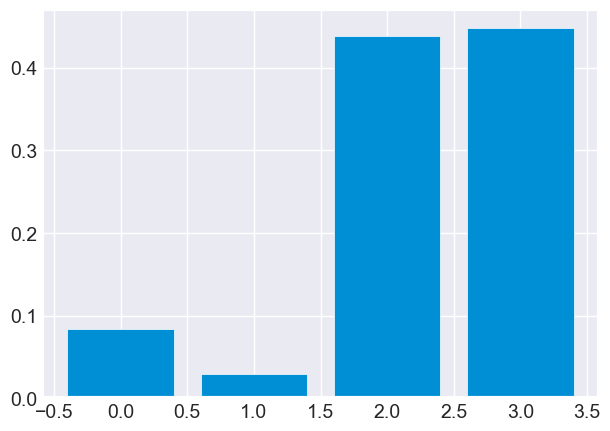

In [73]:
importance = clf.feature_importances_

# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [74]:
y_pred = clf.predict(x_test)

print(accuracy_score(y_test, y_pred))
print('\n')
print(confusion_matrix(y_test, y_pred))
print('\n')
print(classification_report(y_test, y_pred))

0.9666666666666667


[[11  0  0]
 [ 0 10  0]
 [ 0  1  8]]


                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.91      1.00      0.95        10
 Iris-virginica       1.00      0.89      0.94         9

       accuracy                           0.97        30
      macro avg       0.97      0.96      0.96        30
   weighted avg       0.97      0.97      0.97        30



In [75]:
# SVM (Support Vector Machine)

svn = svm.SVC()    
svn.fit(x_train, y_train)    
predictions = svn.predict(x_test)

print(accuracy_score(y_test, predictions))
print('\n')
print(confusion_matrix(y_test, predictions))
print('\n')
print(classification_report(y_test, predictions)) 

1.0


[[11  0  0]
 [ 0 10  0]
 [ 0  0  9]]


                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        10
 Iris-virginica       1.00      1.00      1.00         9

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [76]:
# Gaussian Naive Bayes

from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.91      1.00      0.95        10
 Iris-virginica       1.00      0.89      0.94         9

       accuracy                           0.97        30
      macro avg       0.97      0.96      0.96        30
   weighted avg       0.97      0.97      0.97        30

[[11  0  0]
 [ 0 10  0]
 [ 0  1  8]]
accuracy is 0.9666666666666667


In [77]:
# Decision Tree
import sklearn.metrics as metrics
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(x_train, y_train)
prediction=model.predict(x_test)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction,y_test))

# A detailed classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction))

The accuracy of the Decision Tree is 1.0
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        10
 Iris-virginica       1.00      1.00      1.00         9

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.05581
Feature: 3, Score: 0.94419


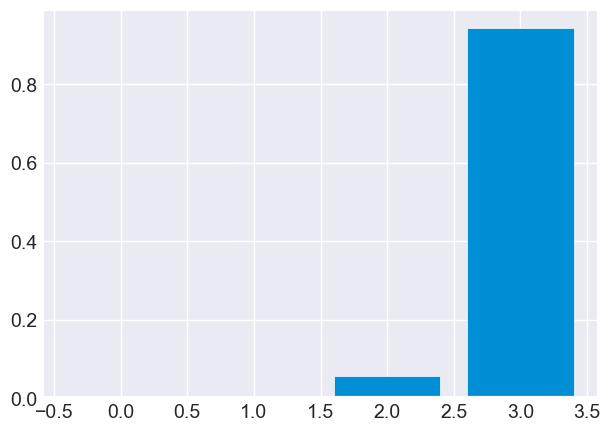

In [78]:
DCT = DecisionTreeClassifier(criterion='gini', max_depth=3)
DCT.fit(x_train, y_train)

importance = DCT.feature_importances_

# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [79]:
DCT.classes_

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [80]:
DCT.feature_importances_

array([0.        , 0.        , 0.05580992, 0.94419008])

<BarContainer object of 4 artists>

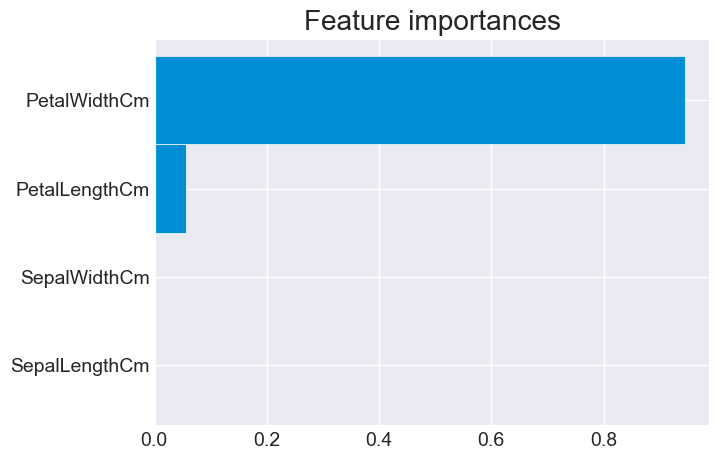

In [81]:
plt.tight_layout()
plt.title("Feature importances")
plt.barh(x.columns, DCT.feature_importances_, 1)